### Основы

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
df.shape

(1000, 8)

In [9]:
df.groupby('gender').aggregate({'writing score' : 'mean'})

,writing score
gender,
female,72.467181
male,63.311203


In [10]:
df.size

8000

In [11]:
df.iloc[0:5, 0:3]

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
1,female,group C,some college
2,female,group B,master's degree
3,male,group A,associate's degree
4,male,group C,some college


In [13]:
df.iloc[[0, 3, 5, -1], [0, 7, -1]]

,gender,writing score,writing score
0,female,74,74
3,male,44,44
5,female,78,78
999,female,86,86


In [18]:
df_with_names = df.iloc[[0, 3, 4, 7, 8]]

In [21]:
df_with_names.index = ['Cersei', 'Tywin', 'Gregor', 'Joffrey', 'Ilyn Payne']
df_with_names

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Cersei,female,group B,bachelor's degree,standard,none,72,72,74
Tywin,male,group A,associate's degree,free/reduced,none,47,57,44
Gregor,male,group C,some college,standard,none,76,78,75
Joffrey,male,group B,some college,free/reduced,none,40,43,39
Ilyn Payne,male,group D,high school,free/reduced,completed,64,64,67


In [28]:
type(df_with_names.loc[['Cersei', 'Gregor'], ['race/ethnicity', 'lunch']])

pandas.core.frame.DataFrame

In [27]:
type(df_with_names.iloc[:, 0])

pandas.core.series.Series

In [37]:
series1 = pd.Series([1, 2, 3], index = ['Cersei', 'Gregor', 'Tywin'])
series2 = pd.Series([4, 5, 6, 7], index = ['Cersei', 'Gregor', 'Tywin', 'Joffrey'])

In [38]:
pd.DataFrame({'col_name1' : series1, 'col_name2' : series2})

,col_name1,col_name2
Cersei,1.0,4
Gregor,2.0,5
Joffrey,NaN,7
Tywin,3.0,6


In [41]:
df_with_names['gender'].shape

(5,)

In [42]:
df_with_names[['gender']].shape

(5, 1)

In [52]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [62]:
df = pd.read_csv('data/titanic.csv')
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Фильтрация данных

In [288]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.loc[df.gender == 'female', ['gender', 'writing score']]

,gender,writing score
0,female,74
1,female,88
2,female,93
5,female,78
6,female,92
...,...,...
993,female,74
995,female,95
997,female,65
998,female,77


In [76]:
mean_writing_score = df['writing score'].mean()

In [77]:
df.loc[df['writing score'] > mean_writing_score]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [80]:
# дурной тон задавать query, как query, нужно более подробно
query = (df['writing score'] > mean_writing_score) & (df['gender'] == 'female')
query

0       True
1       True
2       True
3      False
4      False
       ...  
995     True
996    False
997    False
998     True
999     True
Length: 1000, dtype: bool

In [82]:
result = df[query]
result

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


**Задание:**

У какой доли студентов из датасэта в колонке lunch указано free/reduced?

In [93]:
df[df['lunch'] == 'free/reduced'].shape[0]/df.shape[0]

0.355

**Задание:**

Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?

In [118]:
df.loc[df['lunch'] == 'standard'].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [119]:
df.loc[df['lunch'] == 'free/reduced'].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


---

In [115]:
mean_marks_standart_lunch = df.loc[df['lunch'] == 'standard', ['math score', 'reading score', 'writing score']].mean()
dispersion_marks_standart_lunch = df.loc[df['lunch'] == 'standard', ['math score', 'reading score', 'writing score']].var()
mean_marks_reduced_lunch = df.loc[df['lunch'] == 'free/reduced', ['math score', 'reading score', 'writing score']].mean()
dispersion_marks_reduced_lunch = df.loc[df['lunch'] == 'free/reduced', ['math score', 'reading score', 'writing score']].var()
print(f'''
mean_marks_standart_lunch: 
{mean_marks_standart_lunch}

dispersion_marks_standart_lunch: 
{dispersion_marks_standart_lunch}

mean_marks_reduced_lunch: 
{mean_marks_reduced_lunch}

dispersion_marks_reduced_lunch: 
{dispersion_marks_reduced_lunch}
''')


mean_marks_standart_lunch: 
math score       70.034109
reading score    71.654264
writing score    70.823256
dtype: float64

dispersion_marks_standart_lunch: 
math score       186.418089
reading score    191.285560
writing score    205.620887
dtype: float64

mean_marks_reduced_lunch: 
math score       58.921127
reading score    64.653521
writing score    63.022535
dtype: float64

dispersion_marks_reduced_lunch: 
math score       229.824270
reading score    221.871139
writing score    238.202881
dtype: float64



In [121]:
#qf.query()
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [300]:
df = df \
    .rename(columns = 
            {'test preparation course' : 'test_preparation_course',
            'math score' : 'math_score',
            'reading score' : 'reading_score',
            'writing score' : 'writing_score'})
df.head()

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [301]:
df.math_score

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [302]:
reading_score_query = 95

In [303]:
df.query("writing_score > 75 & gender == 'female' & reading_score > @reading_score_query")

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
373,female,group D,some college,standard,completed,82,97,96
403,female,group D,high school,standard,completed,88,99,100
458,female,group E,bachelor's degree,standard,none,100,100,100
514,female,group B,master's degree,free/reduced,completed,77,97,94
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100


In [304]:
list(df)

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [305]:
score_columns = [i for i in list(df) if 'score' in i]
score_columns

['math_score', 'reading_score', 'writing_score']

In [306]:
df[score_columns].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [307]:
df.filter(like = 'score')

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [308]:
df.filter(like = '2', axis = 0)

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score
2,female,group B,master's degree,standard,none,90,95,93
12,female,group B,high school,standard,none,65,81,73
20,male,group D,high school,standard,none,66,69,63
21,female,group B,some college,free/reduced,completed,65,75,70
22,male,group D,some college,standard,none,44,54,53
...,...,...,...,...,...,...,...,...
952,female,group E,some high school,free/reduced,none,74,74,72
962,female,group E,associate's degree,standard,none,100,100,100
972,female,group A,high school,free/reduced,completed,53,50,60
982,male,group B,some high school,standard,completed,79,85,86


### Группировка и агрегация

In [309]:
df.groupby('gender').mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [310]:
mean_scores = df.groupby(['gender', 'race/ethnicity']) \
    .aggregate({'math_score':'mean', 'reading_score':'mean'}) \
    .rename(columns = {'math_score':'mean_math_score', 'reading_score':'mean_reading_score'})
mean_scores

mean_math_score  mean_reading_score
gender race/ethnicity                                     
female group A               58.527778           69.000000
       group B               61.403846           71.076923
       group C               62.033333           71.944444
       group D               65.248062           74.046512
       group E               70.811594           75.840580
male   group A               63.735849           61.735849
       group B               65.930233           62.848837
       group C               67.611511           65.424460
       group D               69.413534           66.135338
       group E               76.746479           70.295775

In [311]:
mean_scores.loc[[('female', 'group A'), ('female', 'group B')]]

mean_math_score  mean_reading_score
gender race/ethnicity                                     
female group A               58.527778           69.000000
       group B               61.403846           71.076923

In [312]:
mean_scores = df.groupby(['gender', 'race/ethnicity'], as_index=False) \
    .aggregate({'math_score':'mean', 'reading_score':'mean'}) \
    .rename(columns = {'math_score':'mean_math_score', 'reading_score':'mean_reading_score'})
mean_scores

,gender,race/ethnicity,mean_math_score,mean_reading_score
0,female,group A,58.527778,69.000000
1,female,group B,61.403846,71.076923
2,female,group C,62.033333,71.944444
3,female,group D,65.248062,74.046512
4,female,group E,70.811594,75.840580
5,male,group A,63.735849,61.735849
6,male,group B,65.930233,62.848837
7,male,group C,67.611511,65.424460
8,male,group D,69.413534,66.135338
9,male,group E,76.746479,70.295775


In [313]:
df.math_score.nunique()

81

In [314]:
df.groupby(['gender', 'race/ethnicity']).math_score.unique()

gender  race/ethnicity
female  group A           [50, 55, 41, 58, 51, 44, 71, 38, 49, 59, 47, 7...
        group B           [72, 90, 71, 88, 38, 65, 18, 63, 53, 47, 79, 5...
        group C           [69, 54, 67, 58, 66, 71, 33, 0, 60, 39, 73, 76...
        group D           [62, 69, 74, 50, 75, 57, 59, 58, 61, 71, 73, 6...
        group E           [56, 50, 82, 62, 63, 99, 42, 66, 75, 81, 83, 4...
male    group A           [47, 78, 73, 39, 62, 80, 50, 54, 57, 77, 72, 6...
        group B           [40, 69, 57, 59, 65, 67, 61, 44, 49, 79, 60, 9...
        group C           [76, 58, 88, 46, 70, 55, 82, 53, 61, 49, 27, 7...
        group D           [64, 40, 66, 44, 74, 88, 52, 58, 45, 63, 42, 6...
        group E           [97, 81, 53, 77, 79, 30, 72, 66, 83, 87, 70, 1...
Name: math_score, dtype: object

In [317]:
df.sort_values(['gender', 'math_score'], ascending=False) \
    .groupby('gender').head()

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [184]:
df['total_score'] = df.math_score + df.reading_score + df.writing_score
df

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [186]:
df = df.assign(total_score_log = np.log(df.total_score))
df

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,5.641907
996,male,group C,high school,free/reduced,none,62,55,55,172,5.147494
997,female,group C,high school,free/reduced,completed,59,71,65,195,5.273000
998,female,group D,some college,standard,completed,68,78,77,223,5.407172


In [191]:
df.drop(['total_score', 'lunch'], axis = 1)

,gender,race/ethnicity,parental level of education,test_preparation_course,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,none,72,72,74,5.384495
1,female,group C,some college,completed,69,90,88,5.509388
2,female,group B,master's degree,none,90,95,93,5.627621
3,male,group A,associate's degree,none,47,57,44,4.997212
4,male,group C,some college,none,76,78,75,5.433722
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95,5.641907
996,male,group C,high school,none,62,55,55,5.147494
997,female,group C,high school,completed,59,71,65,5.273000
998,female,group D,some college,completed,68,78,77,5.407172


In [192]:
df

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,5.641907
996,male,group C,high school,free/reduced,none,62,55,55,172,5.147494
997,female,group C,high school,free/reduced,completed,59,71,65,195,5.273000
998,female,group D,some college,standard,completed,68,78,77,223,5.407172


**Задание:**

Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs).

In [225]:
df = pd.read_csv('data/dota_hero_stats.csv')
df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [226]:
df.legs.value_counts()

2    95
0    11
4     7
6     3
8     1
Name: legs, dtype: int64

In [227]:
df.groupby('legs').count()

,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,11,11,11,11,11,11
2,95,95,95,95,95,95,95
4,7,7,7,7,7,7,7
6,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1


In [228]:
df = pd.read_csv('data/accountancy.csv')
df.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


**Задание:**

К нам поступили данные из бухгалтерии о заработках Лупы и Пупы за разные задачи! Посмотрите у кого из них больше средний заработок в различных категориях (колонка Type) и заполните таблицу, указывая исполнителя с большим заработком в каждой из категорий.

In [229]:
df.groupby(['Type', 'Executor'])['Salary'].mean()

Type  Executor
A     Loopa        58.000000
      Pupa        160.833333
B     Loopa       145.166667
      Pupa         77.000000
C     Loopa       154.333333
      Pupa         74.500000
D     Loopa       137.714286
      Pupa        146.500000
E     Loopa       164.000000
      Pupa        131.200000
F     Loopa       238.000000
      Pupa        136.250000
Name: Salary, dtype: float64

In [230]:
df.groupby(['Type', 'Executor']).Salary.mean()

Type  Executor
A     Loopa        58.000000
      Pupa        160.833333
B     Loopa       145.166667
      Pupa         77.000000
C     Loopa       154.333333
      Pupa         74.500000
D     Loopa       137.714286
      Pupa        146.500000
E     Loopa       164.000000
      Pupa        131.200000
F     Loopa       238.000000
      Pupa        136.250000
Name: Salary, dtype: float64

**Задача:**

Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик.

In [318]:
df = pd.read_csv('data/dota_hero_stats.csv')
df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [345]:
df.groupby(['attack_type', 'primary_attr']).count().sort_values('id', ascending=False)

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Ranged      int                   40  40    40              40    40     40
Melee       str                   35  35    35              35    35     35
            agi                   19  19    19              19    19     19
Ranged      agi                   18  18    18              18    18     18
            str                    3   3     3               3     3      3
Melee       int                    2   2     2               2     2      2

**Задание:**

Пользуясь предыдущими данными, укажите через пробел (без запятых) чему равны минимальная, средняя и максимальная концентрации аланина (alanin) среди видов рода Fucus. Округлите до 2-ого знака, десятичным разделителем является точка.

In [349]:
df = pd.read_csv('data/algae.csv')
df.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [397]:
df.loc[df['genus'] == 'Fucus'].alanin.round(decimals = 2)

0    3.71
2    0.35
3    6.64
Name: alanin, dtype: float64

In [402]:
round(df.loc[df['genus'] == 'Fucus'].alanin.mean(), ndigits = 2)

3.57

In [394]:
df.query("genus == 'Fucus'").alanin.round(decimals = 2)

0    3.71
2    0.35
3    6.64
Name: alanin, dtype: float64

---

In [403]:
df

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [408]:
df_by_group = df.groupby('group')
df_by_group.count()

,species,genus,sucrose,alanin,citrate,glucose,oleic_acid
group,,,,,,,
brown,6,6,6,6,6,6,6
green,3,3,3,3,3,3,3
red,1,1,1,1,1,1,1


In [413]:
# Размах
df_by_group.sucrose.max() - df_by_group.sucrose.min()

group
brown    5.189345
green    3.259662
red      0.000000
Name: sucrose, dtype: float64

In [415]:
df_by_group.citrate.var()

group
brown    5.468942
green    3.950113
red           NaN
Name: citrate, dtype: float64

### Визуализация

In [417]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:>

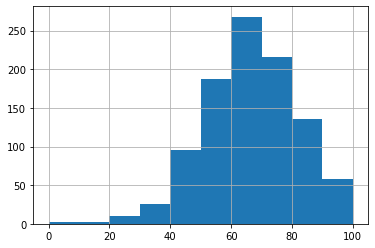

In [424]:
df = df.rename(columns = {
    'math score' : 'math_score',
    'reading score' : 'reading_score',
    'writing score' : 'writing_score'
})
df.math_score.hist()

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

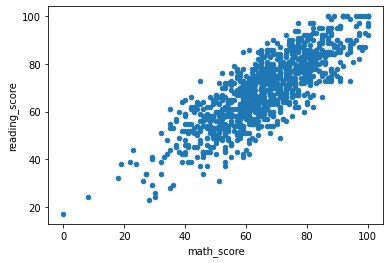

In [426]:
df.plot.scatter(x="math_score", y="reading_score")

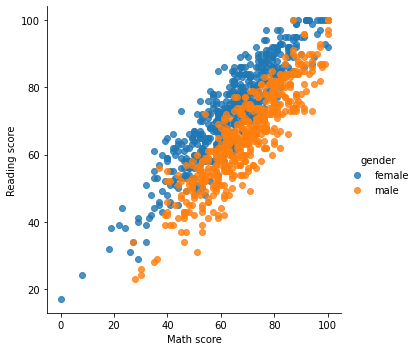

In [437]:
import seaborn as sns
ax = sns.lmplot(x="math_score", y="reading_score", hue="gender", data=df, fit_reg=False)
ax.set_xlabels("Math score")
ax.set_ylabels("Reading score")

**Задание:**

Представьте, что у вас есть датафрэйм df, хранящий данные о зарплате за месяц, со всего 1-ой колонкой income.

Укажите верные способы, как отрисовать простой график зависимости зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)

In [441]:
import seaborn as sns
df = pd.read_csv('data/income.csv')
df

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


<AxesSubplot:>

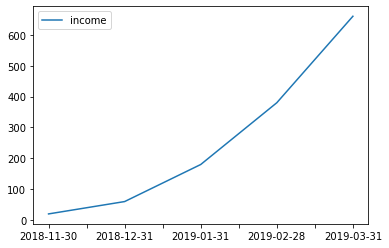

In [442]:
df.plot(kind="line")

<AxesSubplot:>

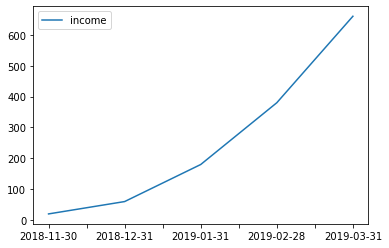

In [443]:
df.plot()

<AxesSubplot:>

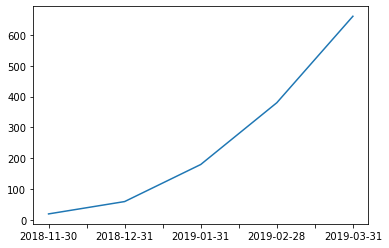

In [446]:
df.income.plot()

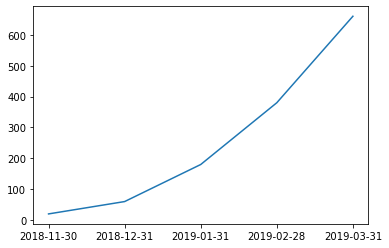

In [448]:
import matplotlib.pyplot as plt
plt.plot(df.index, df.income)

<AxesSubplot:ylabel='income'>

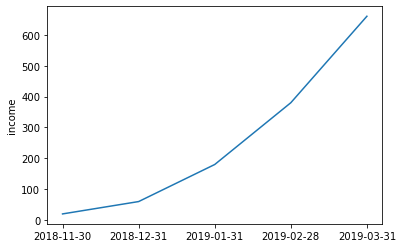

In [449]:
sns.lineplot(x=df.index, y=df.income)

<AxesSubplot:>

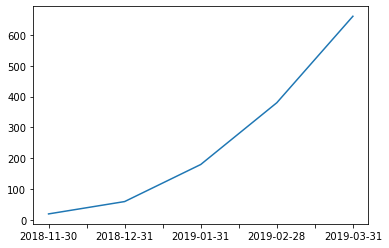

In [450]:
df['income'].plot()

<AxesSubplot:>

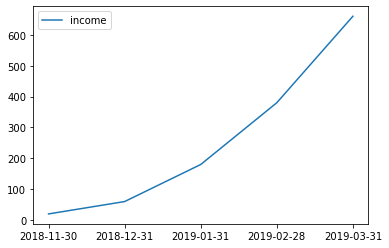

In [451]:
sns.lineplot(data = df)

**Задание:**

Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

In [462]:
df = pd.read_csv('data/dataset_209770_6.txt', sep=" ")
df

,x,y
0,607.556966,603.779431
1,1498.894987,914.408994
2,91.723505,402.083886
3,1483.489707,899.588882
4,206.787619,1514.441439
...,...,...
65,409.812998,1296.175357
66,291.155832,301.084759
67,102.343425,412.018688
68,597.947979,613.888166


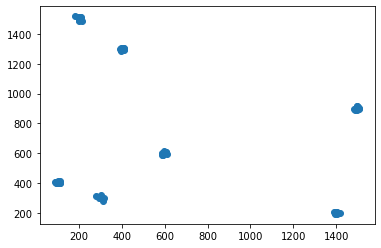

In [466]:
plt.scatter(x="x", y="y", data=df)

In [474]:
df = pd.read_csv("data/genome_matrix.csv")
# df = pd.read_csv('data/genome_matrix.csv', index_col=0)

df

,Unnamed: 0,species0,species1,species2,species3,species4
0,species0,0.536029,0.920292,0.679708,0.840606,0.430842
1,species1,0.920292,0.862417,0.887593,0.769754,0.203214
2,species2,0.679708,0.887593,0.595156,0.003435,0.096052
3,species3,0.840606,0.769754,0.003435,0.458870,0.029251
4,species4,0.430842,0.203214,0.096052,0.029251,0.642109


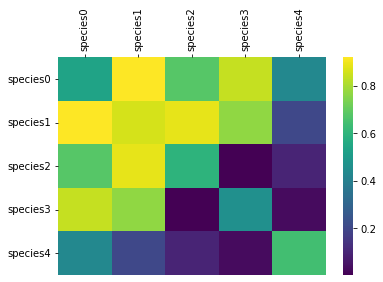

In [492]:
df_frame = df.iloc[:, 1:6]
g = sns.heatmap(df_frame, yticklabels=df["Unnamed: 0"], cmap="viridis")
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

**Задание:**

Пришло время узнать, какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

In [653]:
df = pd.read_csv('data/dota_hero_stats.csv')
df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


0    4
Name: count, dtype: int64

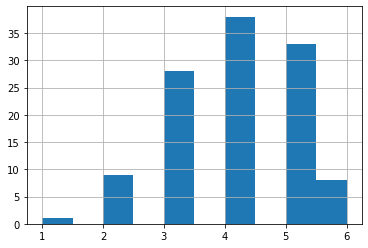

In [658]:
df['count'] = df.roles.str.count(',')+1
df['count'].hist()
df['count'].mode()

Это мне стало интересно, какая роль наиболее популярная:

,roles,Quantities
0,Carry,64
1,Escape,47
2,Nuker,84
3,Initiator,53
4,Durable,47
5,Disabler,86
6,Jungler,15
7,Support,43
8,Pusher,29


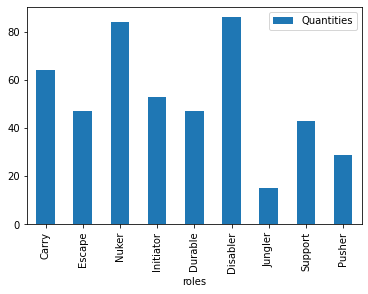

In [639]:
list_of_roles = []
for i, k in df.roles.items():
    roles = k[2:-2]
    list_of_roles.append(roles.split("', '"))
df['list_of_roles'] = list_of_roles

number_of_roles = {}
for i in df.list_of_roles:
    for j in i:
        if j not in number_of_roles:
            number_of_roles[f'{j}'] = 1
        else:
            number_of_roles[f'{j}'] += 1
quantities = pd.DataFrame(list(number_of_roles.items()), columns = ['roles', 'Quantities'])
quantities.plot(kind="bar", x="roles")
quantities

In [672]:
df = pd.read_csv("data/iris.csv")
df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [ ]:
df = df.drop(['species'], axis=1)

In [680]:
df = df.drop(['Unnamed: 0'], axis=1)

<AxesSubplot:ylabel='Density'>

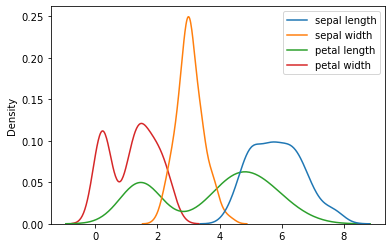

In [682]:
sns.kdeplot(data=df)

<AxesSubplot:>

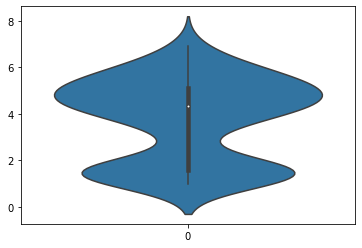

In [684]:
sns.violinplot(data=df['petal length'])

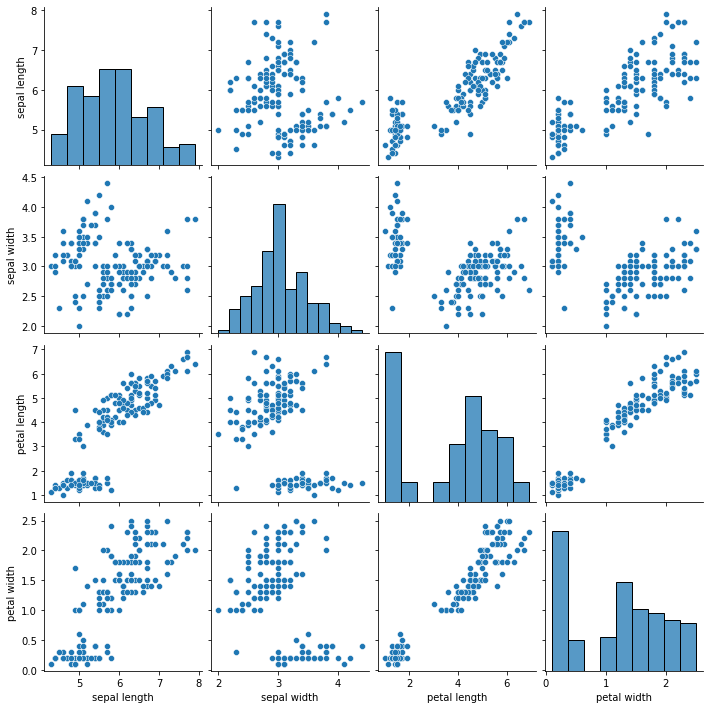

In [686]:
sns.pairplot(data=df)

**Задание:**

Любым удобным для вас способом создайте dataframe c именем my_data, в котором две колонки c именами (type - строки, value - целые числа) и четыре наблюдения в каждой колонке:

In [689]:
my_data = pd.DataFrame({"type":['A', 'A', 'B', 'B'],
           "value":[10, 14, 12, 23]})
my_data


,type,value
0,A,10
1,A,14
2,B,12
3,B,23


**Задание:**

Начнем с простого, в dataframe с именем my_stat сохранено 20 строк и четыре колонки (V1, V2, V3, V4):

В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.
В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.

In [693]:
my_stat = pd.read_csv("data/my_stat.csv")
my_stat

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [718]:
subset_1 = my_stat.iloc[0:10, [0, 2]]
subset_2 = my_stat.iloc[:, [1, 3]]
subset_2 = subset_2.drop(labels=[0,4], axis = 0)

**Задание:**

Теперь потренируемся отбирать нужные нам наблюдения (строки), соответствующие некому условию. В dataframe с именем my_stat четыре колонки V1, V2, V3, V4:

В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'.

В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1.

In [729]:
subset_1 = my_stat.query("V1 > 0 & V3 == 'A'")
subset_2 = my_stat.query("V2 != 10 | V4 >= 1")

<img src="img/speed1.png">

*iloc и loc быстрее, чем query*

**Задание:**

Теперь давайте преобразуем наши данные. В переменной my_stat лежат данные с которыми вам необходимо проделать следующее дейтвие. В этих данных (my_stat) создайте две новые переменных:

V5 = V1 + V4

V6 = натуральный логарифм переменной V2

In [733]:
my_stat['V5'] = my_stat['V1'] + my_stat['V4']
my_stat['V6'] = np.log(my_stat['V2'])
my_stat

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
...,...,...,...,...,...,...
495,1,8.0,A,-1.0,0.0,2.079442
496,3,8.0,A,1.0,4.0,2.079442
497,-1,11.0,B,2.0,1.0,2.397895
498,1,11.0,A,2.0,3.0,2.397895


**Задание:**

Переменные V1, V2  ... такие имена никуда не годятся. С такими названиями легко запутаться в собственных данных и в результате ошибиться в расчетах.

Переименуйте колонки в данных  my_stat следующим образом:

V1 -> session_value

V2 -> group

V3 -> time

V4 -> n_users

In [738]:
my_stat = my_stat.rename(columns = {"V1":"session_value", "V2":"group", "V3":"time", "V4":"n_users"})
my_stat

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
...,...,...,...,...,...,...
495,1,8.0,A,-1.0,0.0,2.079442
496,3,8.0,A,1.0,4.0,2.079442
497,-1,11.0,B,2.0,1.0,2.397895
498,1,11.0,A,2.0,3.0,2.397895


**Задание:**

В dataframe с именем my_stat сохранены данные с 4 колонками: session_value, group, time, n_users.  

В переменной session_value замените все пропущенные значения на нули.

В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без учета отрицательных значений, разумеется).

In [791]:
my_stat = pd.read_csv("data/my_stat_1.csv")
my_stat.loc[np.isnan(my_stat["session_value"]), "session_value"] = 0
median = my_stat.loc[my_stat.n_users >= 0].n_users.median()
my_stat.loc[my_stat.n_users < 0, "n_users"] = median

**Задание:**

В этой задаче для данных my_stat рассчитайте среднее значение переменной session_value для каждой группы (переменная group), в получившемся dataframe  переменная group не должна превратиться в индекс. Также переименуйте колонку со средним значением session_value в mean_session_value.

Получившийся результат сохраните в dataframe с именем mean_session_value_data.

In [800]:
mean_session_value_data = my_stat.groupby('group', as_index = False). \
                            agg({"session_value":"mean"}). \
                            rename(columns={"session_value":"mean_session_value"})

   session_value  time group  n_users
0            0.0    12     B        9
1            0.0    11     A        5
2            1.0     8     A        1
3            2.0     9     B        3
4            2.0    10     B        9
5            3.0     8     A        8
6            0.0    11     B        5
7            0.0     9     A        4
8            0.0     8     B        5
9            0.0     9     A        5


,group,mean_session_value
0,A,0.8
1,B,0.8


### Анализ данных со Stepik

In [583]:
df = pd.read_csv("data/event_data_train.csv")
df

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [584]:
events_data = pd.read_csv('data/submissions_data_train.csv')
events_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [585]:
df['date'] = pd.to_datetime(df.timestamp, unit='s')

In [586]:
df.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [587]:
df.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [588]:
df.date.min()

Timestamp('2015-06-15 04:00:48')

In [589]:
df.date.max()

Timestamp('2018-05-19 23:33:31')

In [590]:
df['day'] = df.date.dt.date

In [591]:
df.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [592]:
sns.set(rc={'figure.figsize':(9, 6)})

<AxesSubplot:xlabel='day'>

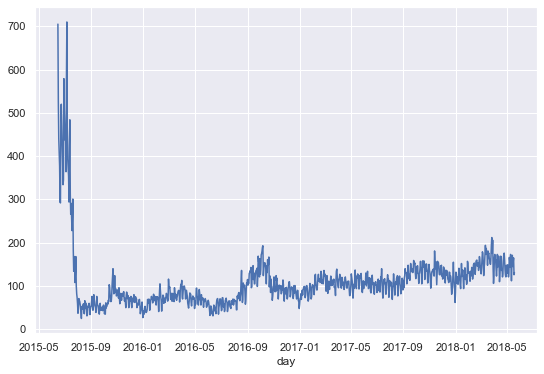

In [593]:
df.groupby('day') \
    .user_id.nunique().plot()

In [594]:
# неправильное решение (мы не взяли людей, которые не прошли не одного степа)
"""
df[df.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id':'count'}) \
    .rename(columns={'step_id':'passed_steps'}).passed_steps.hist()
"""

"\ndf[df.action == 'passed']     .groupby('user_id', as_index=False)     .agg({'step_id':'count'})     .rename(columns={'step_id':'passed_steps'}).passed_steps.hist()\n"

In [595]:
users_events_data = df.pivot_table(index='user_id', 
               columns='action', 
               values='step_id', 
               aggfunc='count',
               fill_value=0).reset_index()

<AxesSubplot:>

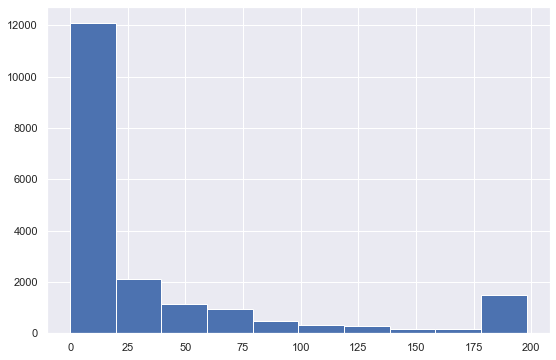

In [596]:
users_events_data.discovered.hist()

In [597]:
submissions_data = pd.read_csv('data/submissions_data_train.csv')
submissions_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [598]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date
0,31971,1434349275,correct,15853,2015-06-15 06:21:15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49
3,31972,1478852164,correct,15853,2016-11-11 08:16:04
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03


In [599]:
users_scores = submissions_data.pivot_table(index='user_id', 
               columns='submission_status', 
               values='step_id', 
               aggfunc='count',
               fill_value=0).reset_index()
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [600]:
gap_data = df[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [601]:
gap_data = pd.Series(np.concatenate(gap_data, axis = 0))

In [602]:
gap_data = gap_data / (24*60*60)

<AxesSubplot:>

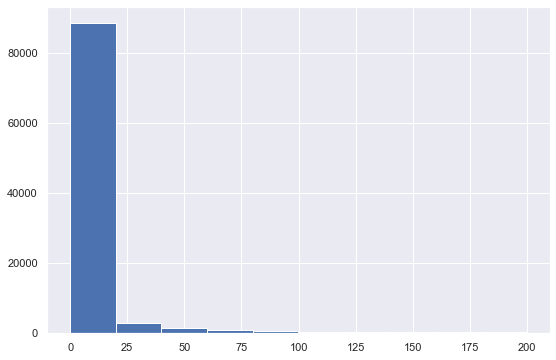

In [603]:
gap_data[gap_data < 200].hist()

In [604]:
gap_data.quantile(0.95)

59.760440972222156

In [605]:
df[df['user_id'] == 17632]

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
2516082,31977,1505649526,viewed,17632,2017-09-17 11:58:46,2017-09-17
2516083,31976,1505649530,viewed,17632,2017-09-17 11:58:50,2017-09-17
2516084,31972,1505649532,viewed,17632,2017-09-17 11:58:52,2017-09-17
2516085,31971,1505649536,viewed,17632,2017-09-17 11:58:56,2017-09-17


In [606]:
df.pivot_table(index='user_id', 
               values='day',
               aggfunc='count').sort_values('day', ascending=False)

,day
user_id,
20907,33043
10794,16436
25279,10179
1046,9095
3572,7905
...,...
19546,2
1,2
11437,1


In [607]:
df.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [39]:
now = 1526772811
drop_out_threshold = 30 * 24 * 60 * 60

In [49]:
users_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp':'max'}).rename(columns={'timestamp':'timestamp_last'})

In [48]:
users_data['is_gone'] = (now - users_data.timestamp_last) > drop_out_threshold
users_data

,user_id,timestamp_last,is_gone
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [44]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [612]:
users_data = users_data.merge(users_scores, on='user_id', how='outer')

In [613]:
users_data.fillna(0)

,user_id,timestamp_last,is_gone,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [28]:
users_data = users_data.merge(users_events_data, how='outer')

In [47]:
users_data

,user_id,timestamp_last,is_gone
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [45]:
users_days = events_data.groupby('user_id').day.nunique()

In [33]:
users_days = users_days.to_frame().reset_index()

In [34]:
users_data = users_data.merge(users_days, how='outer')

In [619]:
df.user_id.nunique()

19234

In [620]:
users_data.user_id.nunique()

19234

In [36]:
users_data['passed_course'] = users_data.passed > 170
users_data.groupby('passed_course').count()

,user_id,last_timestamp,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425


In [622]:
1425 / 17809 * 100

8.001572238755687

In [37]:
users_data

,user_id,last_timestamp,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,1,0,0,1,1,False
1,2,1519226966,9,9,2,10,2,False
2,3,1444581588,91,87,30,192,7,False
3,5,1499859939,11,11,4,12,2,False
4,7,1521634660,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...
19229,26790,1517495987,8,8,1,9,4,False
19230,26793,1510225034,1,0,1,1,1,False
19231,26794,1512035039,69,69,34,180,9,False
19232,26797,1509995096,10,10,2,13,2,False


### Решающие деревья

In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [103]:
from IPython.display import HTML
style = "<style>svg{width:10% !important:height:70% !important;}</style>"
HTML(style)

In [10]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [12]:
X = data[['X_1', 'X_2']]
y = data.Y

In [13]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

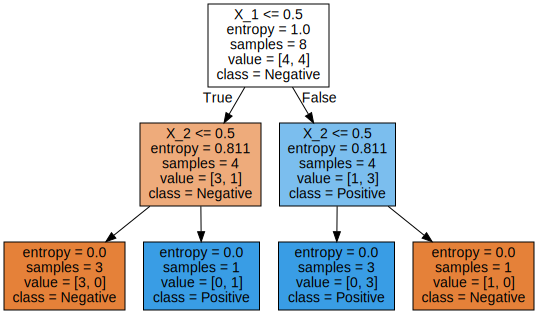

In [16]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

Вычисления:

In [43]:
E0_shert = -(1/1)*np.log2(1/1)
print(E0_shert)
E1_shert = -(4/9)*np.log2(4/9) - (5/9)*np.log2(5/9)
print(E1_shert)
E0_gav = -(4/5)*np.log2(4/5) - (1/5)*np.log2(1/5)
print(E0_gav)
E1_gav = -(5/5)*np.log2(5/5)
print(E1_gav)
E0_tree = (4/4)*np.log2(4/4)
print(E0_tree)
E1_tree = (6/6)*np.log2(6/6)
print(E1_tree)

-0.0
0.9910760598382222
0.7219280948873623
-0.0
0.0
0.0


In [52]:
E = -(4/10)*np.log2(4/10) - (6/10)*np.log2(6/10)
IG_shert = E - (E0_shert*(1/10) + E1_shert*(9/10))
print(IG_shert)
IG_gav = E - (E0_gav*(5/10) + E1_gav*(5/10))
print(IG_gav)
IG_tree = E - (E0_tree*(4/10) + E1_tree*(6/10))
print(IG_tree)
E

0.07898214060026854
0.6099865470109874
0.9709505944546686


0.9709505944546686

### Titanic: Machine Learning from Disaster

In [270]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [272]:
from IPython.display import HTML
style = "<style>svg{width:10% !important:height:70% !important;}</style>"
HTML(style)

In [151]:
titanic_data = pd.read_csv('data/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [153]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [154]:
y = titanic_data.Survived

In [155]:
X = pd.get_dummies(X)

In [156]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [157]:
X = X.fillna({'Age': X.Age.median()})

In [158]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [159]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [160]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

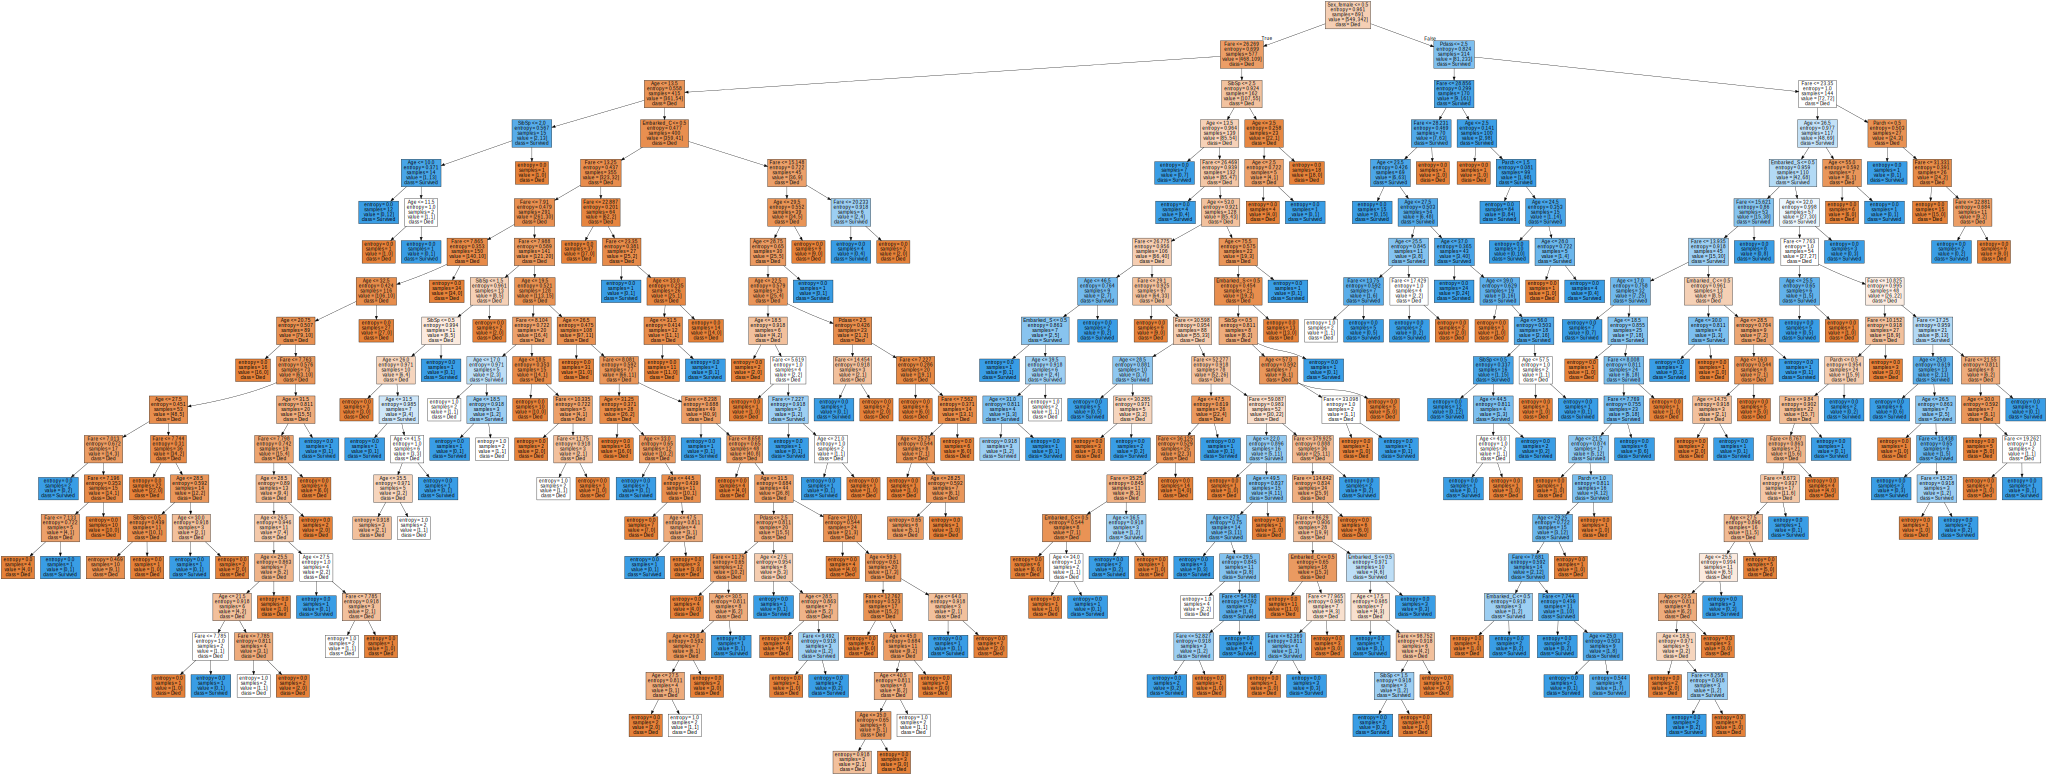

In [161]:
graph = Source(tree.export_graphviz(clf, out_file=None
               , feature_names=list(X), class_names=['Died', 'Survived']
               , filled = True))
display(SVG(graph.pipe(format='svg')))

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [287]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [288]:
clf.score(X_train, y_train)

0.8238255033557047

In [289]:
clf.score(X_test, y_test)

0.8203389830508474

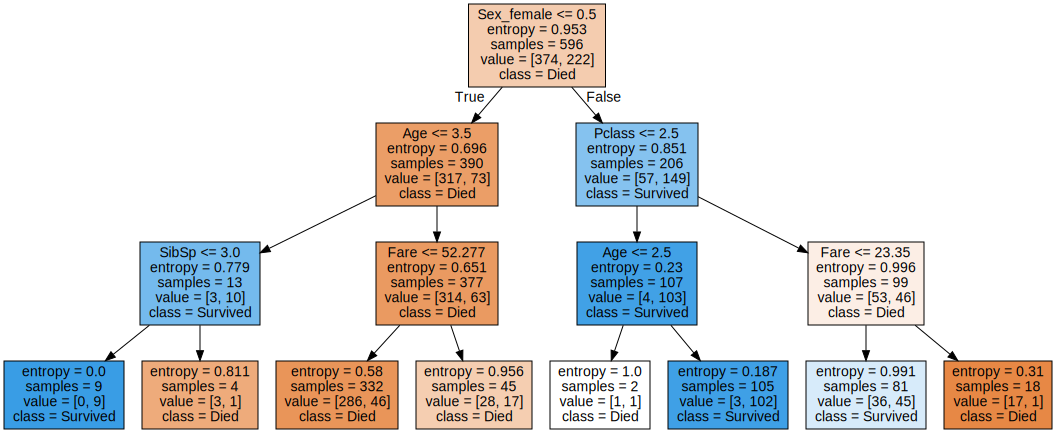

In [290]:
graph = Source(tree.export_graphviz(clf, out_file=None
               , feature_names=list(X), class_names=['Died', 'Survived']
               , filled = True))
display(SVG(graph.pipe(format='svg')))

In [291]:
scores_data = pd.DataFrame()

In [292]:
max_depth_values = range(1, 100)

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 
                                    'train_score':[train_score], 
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.800392
...,...,...,...,...
0,95,0.979866,0.769492,0.768501
0,96,0.979866,0.772881,0.773529
0,97,0.979866,0.772881,0.766835
0,98,0.979866,0.772881,0.776905


In [293]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], var_name='set_type', value_name='score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.768501
293,96,cross_val_score,0.773529
294,97,cross_val_score,0.766835
295,98,cross_val_score,0.776905


<AxesSubplot:xlabel='max_depth', ylabel='score'>

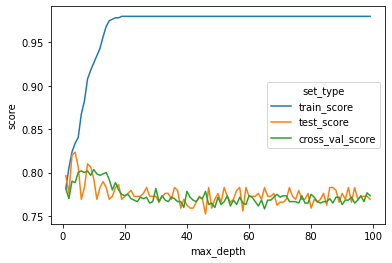

In [294]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data = scores_data_long)

In [295]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.802045
206,9,cross_val_score,0.796989
207,10,cross_val_score,0.803711


In [296]:
from sklearn.model_selection import cross_val_score

In [297]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [298]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7966101694915254

**Задание:**

Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

In [6]:
import numpy as np

In [227]:
train_iris = pd.read_csv('data/train_iris.csv')
train_iris = train_iris.drop(['Unnamed: 0'], axis = 1) 

In [228]:
X = train_iris.drop(labels = ['species'], axis=1)
y = train_iris.species.to_frame()

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)
X_train

,sepal length,sepal width,petal length,petal width
31,5.2,3.5,1.5,0.2
88,6.3,2.5,4.9,1.5
11,5.0,3.2,1.2,0.2
58,6.4,2.9,4.3,1.3
85,6.5,3.2,5.1,2.0
...,...,...,...,...
0,7.4,2.8,6.1,1.9
72,6.0,2.2,5.0,1.5
56,6.7,3.1,5.6,2.4
3,5.8,2.7,5.1,1.9


In [230]:
score_values = pd.DataFrame()

In [231]:
final_data = pd.read_csv('data/test_iris.csv')
final_data = final_data.drop(['Unnamed: 0'], axis = 1)
X_final = final_data.drop(['species'], axis=1)
y_final = final_data.species.to_frame()

In [232]:
np.random.seed(0)
for depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(random_state=np.random.seed(depth), criterion='entropy', max_depth=depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    final_test_score = clf.score(X_final, y_final)
    temp_score_data = pd.DataFrame({'max_depth':[depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score],
                                    'final_test_score':[final_test_score]})
    score_values = pd.concat([score_values, temp_score_data])
score_values

,max_depth,train_score,test_score,cross_val_score,final_test_score
0,1,0.686567,0.727273,0.657143,0.60
0,2,0.970149,0.969697,0.910989,0.94
0,3,0.985075,1.000000,0.910989,0.94
0,4,1.000000,1.000000,0.912088,0.92
0,5,1.000000,1.000000,0.912088,0.92
...,...,...,...,...,...
0,95,1.000000,1.000000,0.926374,0.92
0,96,1.000000,1.000000,0.912088,0.92
0,97,1.000000,1.000000,0.926374,0.92
0,98,1.000000,1.000000,0.910989,0.92


In [233]:
score_data_long = pd.melt(score_values, id_vars = 'max_depth', value_vars=['train_score' \
                                                                          , 'test_score' \
                                                                          , 'cross_val_score' \
                                                                          , 'final_test_score'],
                          var_name='set_type', value_name='score')
score_data_long

,max_depth,set_type,score
0,1,train_score,0.686567
1,2,train_score,0.970149
2,3,train_score,0.985075
3,4,train_score,1.000000
4,5,train_score,1.000000
...,...,...,...
391,95,final_test_score,0.920000
392,96,final_test_score,0.920000
393,97,final_test_score,0.920000
394,98,final_test_score,0.920000


<AxesSubplot:xlabel='max_depth', ylabel='score'>

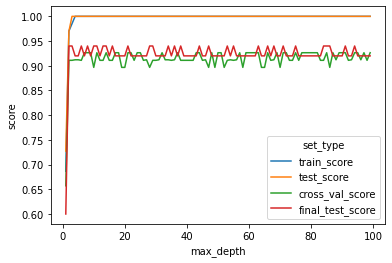

In [235]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data = score_data_long)

**Задание:**

Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! Скачайте тренировочный датасэт и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.

In [73]:
dogs_n_cats = pd.read_csv('data/dogs_n_cats.csv')
dogs_n_cats

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [58]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [60]:
from IPython.display import HTML
style = "<style>svg{width:10% !important:height:70% !important;}</style>"
HTML(style)

In [37]:
from sklearn.model_selection import cross_val_score

In [30]:
from sklearn.model_selection import train_test_split

In [144]:
X = dogs_n_cats.drop(['Вид'], axis = 1)
y = dogs_n_cats['Вид'].to_frame()

In [150]:
clf = tree.DecisionTreeClassifier(random_state=np.random.seed(depth), criterion='entropy', max_depth=1)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

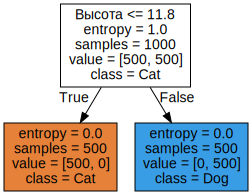

In [149]:
graph = Source(tree.export_graphviz(clf, out_file=None
               , feature_names=list(X), class_names=['Cat', 'Dog']
               , filled = True))
display(SVG(graph.pipe(format='svg')))

In [146]:
data = pd.read_json('data/dataset_209691_15.txt')
data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,28,33.6,1,1,0
1,26,31.2,1,1,0
2,20,24.0,1,1,0
3,29,34.8,1,1,0
4,19,22.8,1,0,0
...,...,...,...,...,...
95,9,3.6,1,0,1
96,10,4.0,1,0,1
97,7,2.8,1,0,1
98,5,2.0,1,0,1


In [147]:
a = clf.predict(data)
count = 0
for i in a:
    if i == 'котик':
        count += 1
count

55

In [151]:
import sklearn.metrics as mcs

<img src="img/confusion_matrix_1.png">

In [155]:
(2 * 0.5 * 0.33) / (0.5 + 0.33)

0.39759036144578314

### Подбор параметров и ROC and Roll

#### Titanic продолжение

In [299]:
from sklearn.model_selection import GridSearchCV

In [301]:
clf = tree.DecisionTreeClassifier()

In [305]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth':range(1,100)}

In [307]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [308]:
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 100)})

In [309]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 100)})

In [310]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [312]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [313]:
best_clf.score(X_test, y_test)

0.7694915254237288

In [318]:
from sklearn.metrics import precision_score, recall_score

In [316]:
y_pred = best_clf.predict(X_test)

In [317]:
precision_score(y_test, y_pred)

0.8023255813953488

In [319]:
recall_score(y_test, y_pred)

0.575

In [322]:
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [0.65625   , 0.34375   ],
       [1.        , 0.        ],
       [0.23809524, 0.76190476],
       [0.88518519, 0.11481481],
       [0.23809524, 0.76190476],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.60714286, 0.39285714],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.60714286, 0.39285714],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.65625   , 0.34375   ],
       [0.

<AxesSubplot:>

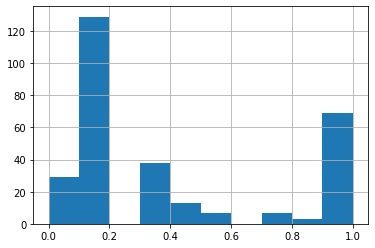

In [324]:
pd.Series(y_predicted_prob[:,1]).hist()

In [351]:
y_pred = np.where(y_predicted_prob[:,1] > 0.7, 1, 0)

In [352]:
precision_score(y_test, y_pred)

0.8481012658227848

In [353]:
recall_score(y_test, y_pred)

0.5583333333333333

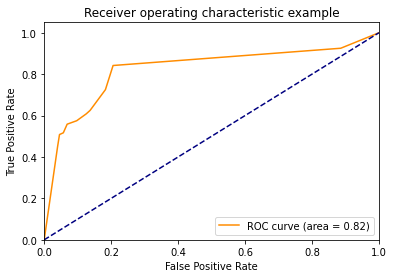

In [335]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Практика, Scikit-learn, fit, predict

**Задание:**

Создайте Decision Tree классификатор, используя одноимённый класс из библиотеки sklearn и сохраните его в переменную dt.

﻿У дерева должны быть следующие параметры:
максимальная глубина - 5 уровней
минимальное число образцов в вершине для разделения - 5

In [390]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

In [355]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

**Задание:**

Скачайте набор данных с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, используйте entropy в качестве критерия.

Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.

In [356]:
df = pd.read_csv('data/train_data_tree.csv')

In [357]:
df

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1
...,...,...,...
233,1,0,0
234,1,1,0
235,1,0,1
236,1,1,1


In [457]:
X = df.drop('num', axis=1)
y = df['num'].to_frame()

In [440]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

In [458]:
clf = DecisionTreeClassifier()

In [459]:
parameters = {'criterion':['entropy'], 'max_depth':range(1,100)}

In [460]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [461]:
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 100)})

In [462]:
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 100)})

In [463]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 1}

In [464]:
best_clf = grid_search_cv_clf.best_estimator_

In [465]:
best_clf.score(X_test, y_test)

0.7215189873417721

In [466]:
y_pred = best_clf.predict(X_test)

In [450]:
precision_score(y_test, y_pred)

0.7916666666666666

In [451]:
recall_score(y_test, y_pred)

0.5277777777777778

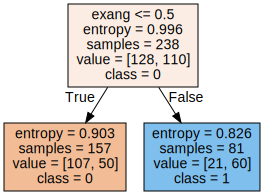

In [469]:
graph = Source(tree.export_graphviz(best_clf, out_file=None
               , feature_names=list(X), class_names=['0', '1']
               , filled = True))
display(SVG(graph.pipe(format='svg')))

In [468]:
0.996 - (157*0.903 + 81*0.826)/238

0.11920588235294105

**Задание:**

Теперь, создав дерево, давайте обучим его и попробуем что-нибудь предсказать!

Для начала опробуем наше дерево на классическом наборе iris, где собраны данные о длине, ширине чашелистиков и лепестков ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.

Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. Используйте функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных, 75% и 25% соответственно.
Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, к которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

In [471]:
from sklearn.datasets import load_iris

In [472]:
iris = load_iris()

In [476]:
X = iris.data
y = iris.target

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [479]:
dt = DecisionTreeClassifier()

In [480]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [483]:
predicted = dt.predict(X_test)

**Задание:**

Одно дерево - хорошо, но где гарантии, что оно является лучшим, или хотя бы близко к нему? Одним из способов найти более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.
Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими параметрами.
Это применимо не только к деревьям, но и к другим моделям sklearn.

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:
максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [485]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

In [486]:
iris = load_iris()
X = iris.data
y = iris.target

In [487]:
clf = DecisionTreeClassifier()

In [520]:
parameters = {'max_depth': range(1, 11), 
              'min_samples_split': range(2, 11),
              'min_samples_leaf': range(1, 11)}

In [508]:
search = GridSearchCV(clf, parameters, cv=5)

In [509]:
search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11)})

In [510]:
best_tree = search.best_estimator_

**Задание:**

Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть RandomizedSearchCV! Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV

максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search

In [511]:
from sklearn.model_selection import RandomizedSearchCV

In [513]:
clf = DecisionTreeClassifier()

In [515]:
search = RandomizedSearchCV(clf, parameters, cv=5)

In [516]:
search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(1, 11),
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [519]:
best_tree = search.best_estimator_

**Задание:**

Даны 2 датасэта, к которым вы можете обращаться:

train - размеченный с известными правильным ответами (хранятся в колонке y)
test - набор, где нужно предсказать их

Найдите дерево с наиболее подходящими параметрами с помощью GridSearchCV и предскажите с его помощью ответы ко 2-ому сэту! Границы параметров как раньше:

максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
Названия переменных тоже:лучшее дерево - best_tree, GridSearchCV - search, а предсказания - predictions

In [521]:
clf = DecisionTreeClassifier()

In [522]:
search = GridSearchCV(clf, parameters, cv=5)

In [ ]:
y_train = train['y']
X_train = train.drop('y', axis = 1)

In [ ]:
search.fit(X_train, y_train)

In [ ]:
best_tree = search.best_estimator_

In [ ]:
best_tree.predict(test)

### Stepik ML contest

In [83]:
submissions_data = pd.read_csv('data/submissions_data_train.csv')
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [142]:
wrong_statuses = submissions_data[submissions_data.submission_status == 'wrong']

users_last_wrong = wrong_statuses.groupby(['step_id', 'user_id']).agg({'timestamp': 'max'})
users_last_wrong.value_counts(subset='step_id')

step_id
31978    3423
32031    3255
31972    3064
32202    2614
31971    2517
         ... 
33681     300
31986     274
33998     251
32175     199
32929      59
Length: 76, dtype: int64

Я где-то накосячил, поэтому просто прикреплю скрипт урока из комментов:

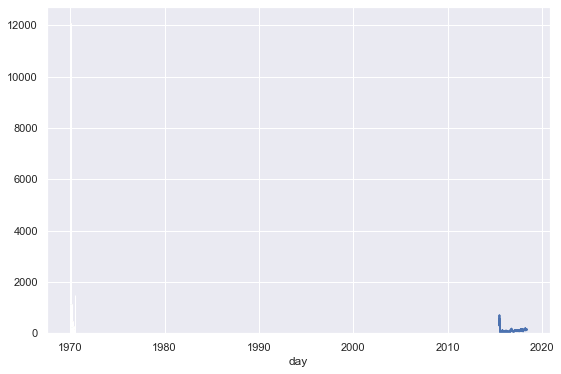

In [145]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from os import system
get_ipython().run_line_magic('matplotlib', 'inline')
from IPython.display import SVG
from graphviz import Source 
from IPython.display import display 
from IPython.display import HTML
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

sns.set(rc={'figure.figsize': (9,6)})


events_data = pd.read_csv('data/event_data_train.csv')
submissions_data = pd.read_csv('data/submissions_data_train.csv')



events_data.head()


events_data['date'] = pd.to_datetime(events_data.timestamp , unit = 's')


events_data.head()


events_data['day'] = events_data.date.dt.date


events_data.groupby('day')    .user_id.nunique().plot()

events_data.pivot_table(index='user_id' , 
                        columns='action' , 
                        values = 'step_id' , 
                        aggfunc = 'count' ,
                       fill_value=0).reset_index().discovered.hist()


users_events_data = events_data.pivot_table(index='user_id' , 
                        columns='action' , 
                        values = 'step_id' , 
                        aggfunc = 'count' ,
                       fill_value=0).reset_index()


users_events_data.head()


#ТЕПЕРЬ ПЕРЕХОДИМ К 2-МУ ДАТАФРЕЙМУ SUBMISSIONS DATA И НАЧИНАЕМ ОБРАБОТКУ ДАННЫХ

submissions_data['date'] = pd.to_datetime(submissions_data.timestamp , unit = 's')
submissions_data['day'] = submissions_data.date.dt.date


users_scores=submissions_data.pivot_table(index='user_id' , 
                        columns='submission_status' , 
                        values = 'step_id' , 
                        aggfunc = 'count' ,
                       fill_value=0).reset_index()


users_scores.head()


gaps_data=events_data[['user_id' , 'day' , 'timestamp']].drop_duplicates(subset=[ 'day' ])    .groupby('user_id')['timestamp'].apply(list)     .apply(np.diff).values




gaps_data=pd.Series(np.concatenate(gaps_data , axis=0))




gaps_data = gaps_data / (24*60*60)   #делим на (20*60*60) что би из таймстемпов подучить значения в днях


gaps_data.quantile(0.90) 


30 * 24 * 60 * 60


users_data = events_data.groupby('user_id' , as_index=False)    .aggregate({'timestamp' : 'max'}).rename(columns={'timestamp' : 'last_timestamp'})


now = 1526772811
drop_out_treshold = 2592000


users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_treshold


users_data = users_data.merge(users_scores , how='outer')


users_data = users_data.fillna(0)


users_data = users_data.merge(users_events_data , how='outer')


users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()


users_data  =  users_data.merge(users_days , how='outer')

users_data['passed_course'] = users_data.passed > 170


users_data.groupby('passed_course').count()


100 *  1425 / 17809   # процент закончивших курс 


users_data.head()     # почти финальная часть обработки данных 


users_data[users_data.passed_course].day.hist()


user_min_time = events_data.groupby('user_id' , as_index=False).agg({'timestamp':'min'}).rename({'timestamp':'min_timestamp'} , axis=1)


users_data = users_data.merge(user_min_time , how='outer')

events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)


learning_time_treshhold =  3 * 24 *60 * 60  #промежуток  3 дня


user_learning_time_treshhold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + learning_time_treshhold).map(str)


user_min_time['user_learning_time_treshhold'] = user_learning_time_treshhold




events_data = events_data = events_data.merge(user_min_time[['user_id','user_learning_time_treshhold']] , how='outer')


events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_treshhold]

submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_treshhold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_treshhold]
submissions_data_train.groupby('user_id').day.nunique().max()


X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index().rename(columns={'day':'days'})


steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index().rename(columns={'step_id':'steps_tried'})


X = X.merge(steps_tried, on='user_id' , how='outer')


X = X.merge(submissions_data_train.pivot_table(index='user_id' , 
                        columns='submission_status' , 
                        values = 'step_id' , 
                        aggfunc = 'count' ,
                       fill_value=0).reset_index())


X['correct_ratio'] = X.correct / (X.correct + X.wrong)


X = X.merge(events_data_train.pivot_table(index='user_id' , 
                        columns='action' , 
                        values = 'step_id' , 
                        aggfunc = 'count' ,
                       fill_value=0).reset_index()[['user_id','viewed']],how='outer')


X = X.fillna(0)


X = X.merge(users_data[['user_id', 'passed_course','is_gone_user']] , how='outer')


X = X[~((X.is_gone_user == False) & (X.passed_course == False))]


y = X.passed_course.map(int)
X = X.drop(['passed_course' , 'is_gone_user'] , axis=1)
X = X.set_index(X.user_id)
X = X.drop('user_id' , axis=1)
                                                                      #финальные данные для работы

## Random Forest

In [174]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [175]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

In [202]:
clf.feature_importances_

array([0.25855365, 0.07794432, 0.        , 0.        , 0.06118735,
       0.        , 0.60231467, 0.        , 0.        , 0.        ])

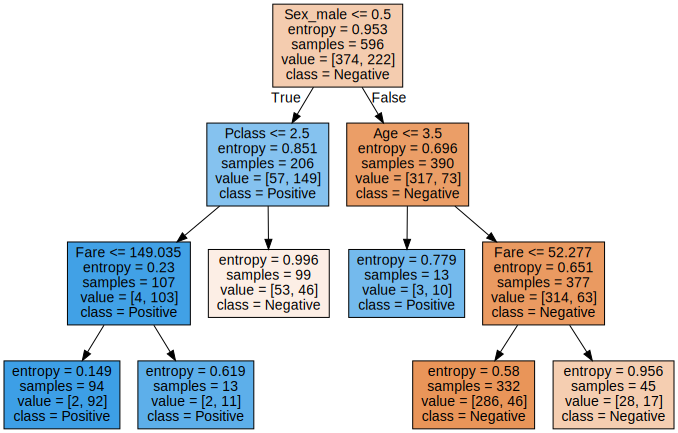

In [176]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
clf_rf = RandomForestClassifier()

In [179]:
parametrs = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [180]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [181]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [182]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 30}

**Задание:**

Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

In [185]:
clf_rf = RandomForestClassifier()

In [187]:
parametrs = {'n_estimators': [15], 'max_depth': [5]}nb 

In [188]:
rf = GridSearchCV(clf_rf, parametrs, cv=5)

In [189]:
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5], 'n_estimators': [15]})

In [190]:
rf.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [192]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

RandomForestClassifier(max_depth=7, n_estimators=30)

In [193]:
best_clf.score(X_test, y_test)

0.8

In [195]:
feature_importances = best_clf.feature_importances_

In [201]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                       'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.297579
4,Fare,0.168897
1,Age,0.143578
0,Pclass,0.131375
5,Sex_female,0.123384
2,SibSp,0.045197
3,Parch,0.040988
9,Embarked_S,0.019963
7,Embarked_C,0.016475
8,Embarked_Q,0.012566


**Задание:**

Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).


In [203]:
heart_diseases = pd.read_csv('data/heart-disease.csv')

In [207]:
X = heart_diseases.drop('target', axis=1)
y = heart_diseases['target']

In [212]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

In [213]:
rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

<AxesSubplot:>

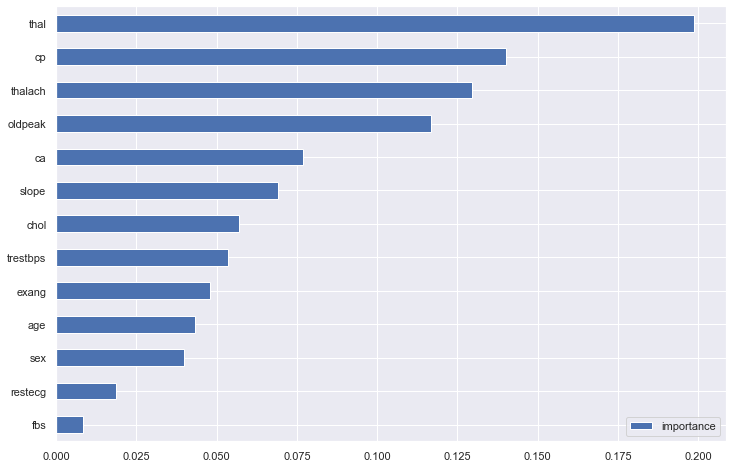

In [214]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

### Практика

### Задание про грибы

In [215]:
data_mush = pd.read_csv('data/training_mush.csv')

In [216]:
data_mush

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [220]:
X = data_mush.drop('class', axis=1)
y = data_mush['class']

In [296]:
rf = RandomForestClassifier() 

parametrs = {'n_estimators': range(10, 51, 10), 
             'max_depth': range(1, 13, 2),
             'min_samples_leaf': range(1, 8),
             'min_samples_split': range(2, 10, 2)}

In [223]:
grid_search_cv_clf = GridSearchCV(rf, parametrs, n_jobs=-1, cv=3)

In [224]:
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [231]:
best_rf = grid_search_cv_clf.best_estimator_

<AxesSubplot:>

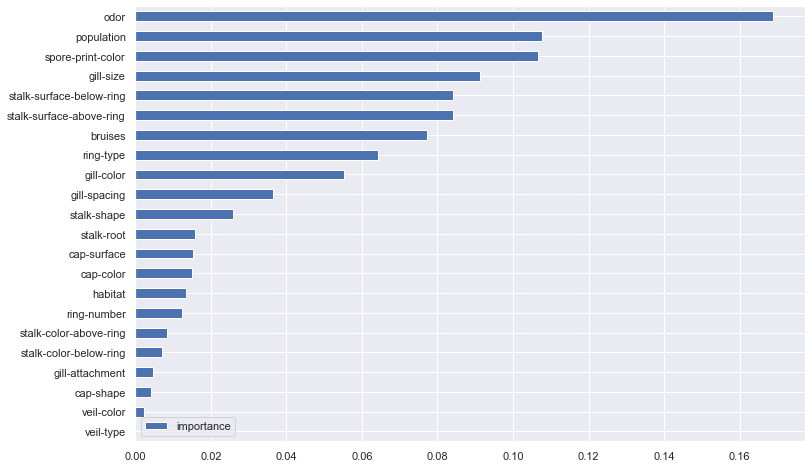

In [232]:
imp = pd.DataFrame(best_rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [233]:
test_mush = pd.read_csv('data/testing_mush.csv')

In [235]:
prediction = best_rf.predict(test_mush)

In [238]:
np.count_nonzero(prediction == 1)

976

In [239]:
y_test = pd.read_csv('data/testing_y_mush.csv')

In [242]:
from sklearn.metrics import confusion_matrix

array([[1055,    0],
       [   0,  976]], dtype=int64)

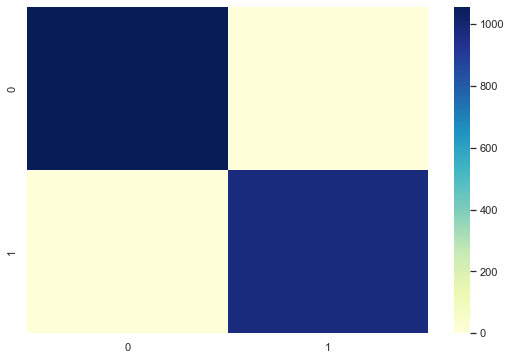

In [249]:
confusion_matrix_mush = confusion_matrix(y_test, prediction)
sns.color_palette("mako", as_cmap=True)
sns.heatmap(confusion_matrix_mush, cmap="YlGnBu")
confusion_matrix_mush

### Задание про космос №1

In [250]:
data_army = pd.read_csv('data/invasion.csv')

In [282]:
X_train = data_army.drop('class', axis=1)
y_train = data_army['class']

In [283]:
X_train

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...
495,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [284]:
rf = RandomForestClassifier()

In [340]:
parametrs = {'n_estimators': range(10, 30, 10),
             'max_depth': range(1, 7),
             'min_samples_leaf': range(1, 5),
             'min_samples_split': range(1, 5)}

In [297]:
grid_search_cv_clf = GridSearchCV(rf, parametrs, n_jobs=-1, cv=5)

In [300]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [306]:
best_rf = grid_search_cv_clf.best_estimator_

In [302]:
test_army = pd.read_csv('data/operative_information.csv')

In [316]:
prediction = best_rf.predict(test_army)
np.unique(prediction)

array(['cruiser', 'fighter', 'transport'], dtype=object)

In [317]:
np.count_nonzero(prediction == 'cruiser')

230

<AxesSubplot:>

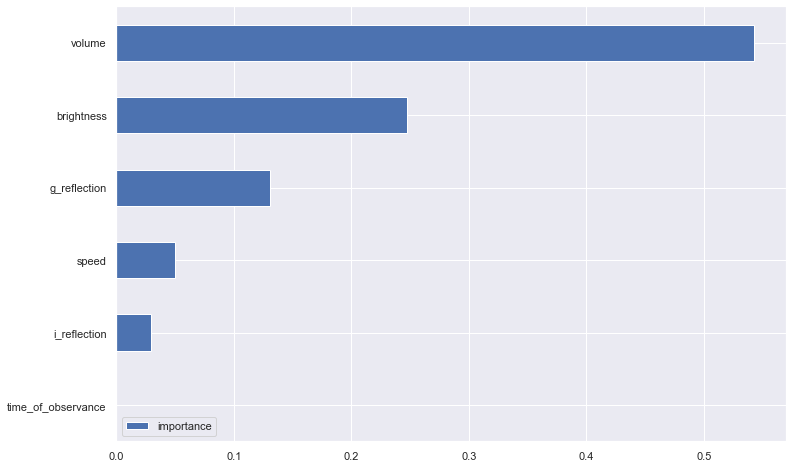

In [320]:
imp = pd.DataFrame(best_rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

### Задание про космос №2

In [321]:
data_danger = pd.read_csv('data/space_can_be_a_dangerous_place.csv')

In [322]:
data_danger

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


In [323]:
X_train = data_danger.drop('dangerous', axis=1)
y_train = data_danger['dangerous']

In [324]:
rf = RandomForestClassifier()

In [341]:
parametrs = {'n_estimators': range(10, 51, 10), 
             'max_depth': range(1, 13, 2),
             'min_samples_leaf': range(1, 8),
             'min_samples_split': range(2, 10, 2)}

In [342]:
grid_search_cv_clf = RandomizedSearchCV(rf, parametrs, n_jobs=-1, cv=5)

In [343]:
grid_search_cv_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(1, 13, 2),
                                        'min_samples_leaf': range(1, 8),
                                        'min_samples_split': range(2, 10, 2),
                                        'n_estimators': range(10, 51, 10)})

In [348]:
X_train

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo
0,169.1,138.0,22.3212,0.706285,0,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1
...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1


In [347]:
best_rf = grid_search_cv_clf.best_estimator_
best_rf.feature_importances_

array([0.00607302, 0.00386987, 0.0040184 , 0.02125201, 0.02418069,
       0.59957853, 0.34102747])

### Трюки в Pandas

In [2]:
import pandas as pd

In [3]:
movie = pd.read_csv('data/movie_metadata.csv')

In [4]:
movie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [6]:
genres = movie[['movie_title', 'genres']]

In [7]:
genres

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,Star Wars: Episode VII - The Force Awakens ...,Documentary
...,...,...
5038,Signed Sealed Delivered,Comedy|Drama
5039,The Following,Crime|Drama|Mystery|Thriller
5040,A Plague So Pleasant,Drama|Horror|Thriller
5041,Shanghai Calling,Comedy|Drama|Romance


In [12]:
def reversator(value):
    return value[::-1]

In [13]:
for row in genres.values:
    for value in row:
        print(reversator(value))

 ratavA
iF-icS|ysatnaF|erutnevdA|noitcA
 dnE s'dlroW tA :naebbiraC eht fo setariP
ysatnaF|erutnevdA|noitcA
 ertcepS
rellirhT|erutnevdA|noitcA
 sesiR thginK kraD ehT
rellirhT|noitcA
             snekawA ecroF ehT - IIV edosipE :sraW ratS
yratnemucoD
 retraC nhoJ
iF-icS|erutnevdA|noitcA
 3 naM-redipS
ecnamoR|erutnevdA|noitcA
 delgnaT
ecnamoR|lacisuM|ysatnaF|ylimaF|ydemoC|noitaminA|erutnevdA
 nortlU fo egA :sregnevA
iF-icS|erutnevdA|noitcA
 ecnirP doolB-flaH eht dna rettoP yrraH
yretsyM|ysatnaF|ylimaF|erutnevdA
 ecitsuJ fo nwaD :namrepuS v namtaB
iF-icS|erutnevdA|noitcA
 snruteR namrepuS
iF-icS|erutnevdA|noitcA
 ecaloS fo mutnauQ
erutnevdA|noitcA
 tsehC s'naM daeD :naebbiraC eht fo setariP
ysatnaF|erutnevdA|noitcA
 regnaR enoL ehT
nretseW|erutnevdA|noitcA
 leetS fo naM
iF-icS|ysatnaF|erutnevdA|noitcA
 naipsaC ecnirP :ainraN fo selcinorhC ehT
ysatnaF|ylimaF|erutnevdA|noitcA
 sregnevA ehT
iF-icS|erutnevdA|noitcA
 sediT regnartS nO :naebbiraC eht fo setariP
ysatnaF|erutnevdA|noitcA
 3 kcalB 

 kerhS
ysatnaF|ylimaF|ydemoC|noitaminA|erutnevdA
 uaeruB tnemtsujdA ehT
rellirhT|iF-icS|ecnamoR
 seveihT fo ecnirP :dooH niboR
ecnamoR|amarD|erutnevdA|noitcA
 eriugaM yrreJ
tropS|ecnamoR|amarD|ydemoC
 deT
ysatnaF|ydemoC
 steG tI sa dooG sA
ecnamoR|amarD|ydemoC
 smadA hctaP
ecnamoR|amarD|ydemoC|yhpargoiB
 seunitnoC dnegeL ehT :2 namrohcnA
ydemoC
 sdeeD .rM
ecnamoR|ydemoC
 8 repuS
rellirhT|iF-icS|yretsyM
 hcivokcorB nirE
amarD|yhpargoiB
 syaD 01 ni yuG a esoL ot woH
ecnamoR|ydemoC
 teertS pmuJ 22
emirC|ydemoC|noitcA
 selcinorhC eripmaV ehT :eripmaV eht htiw weivretnI
rorroH|ysatnaF|amarD
 naM seY
ecnamoR|ydemoC
 ecnegilletnI lartneC
emirC|ydemoC|noitcA
 mompetS
amarD|ydemoC
 emoH s'yddaD
ylimaF|ydemoC
 sdooW eht otnI
lacisuM|ysatnaF|amarD|ydemoC|erutnevdA
 naM edisnI
rellirhT|yretsyM|amarD|emirC
 kcabyaP
rellirhT|amarD|emirC|noitcA
 ognoC
iF-icS|yretsyM|erutnevdA|noitcA
 ooZ a thguoB eW
ylimaF|amarD|ydemoC
 gniwonK
rellirhT|iF-icS|yretsyM|amarD
 hcnuaL ot eruliaF
ecnamoR|ydemoC
 owT gniR

 siraP ni thgindiM
ecnamoR|ysatnaF|ydemoC
 boJ tuN ehT
ylimaF|ydemoC|noitaminA|erutnevdA
 wolB
amarD|emirC|yhpargoiB
 elttoB a ni egasseM
ecnamoR|amarD
 reitnorF laniF ehT :V kerT ratS
rellirhT|iF-icS|erutnevdA|noitcA
 ekiM ekiL
tropS|ysatnaF|ylimaF|ydemoC
 tlusnI laniF ehT :3/1 33 nuG dekaN
emirC|ydemoC
 lliK a ot weiV A
rellirhT|erutnevdA|noitcA
 tibbaR-ereW eht fo esruC ehT
iF-icS|yretsyM|ylimaF|ydemoC|noitaminA
 uoY evoL I .S.P
ecnamoR|amarD
 sepirtS gnicaR
tropS|ylimaF|amarD|ydemoC|erutnevdA
 tnemenotA
raW|ecnamoR|yretsyM|amarD
 teiluJ ot sretteL
ecnamoR|amarD|ydemoC
 niaR kcalB
rellirhT|emirC|noitcA
 segootS eerhT ehT
ydemoC
 edirB esproC
ecnamoR|lacisuM|ysatnaF|ylimaF|amarD|noitaminA
 daoR yrolG
tropS|amarD|yhpargoiB
 oiraciS
rellirhT|yretsyM|amarD|emirC|noitcA
 waphtuoS
tropS|amarD
 lleH ot eM garD
rellirhT|rorroH
 eniladA fo egA ehT
ecnamoR|ysatnaF|amarD
 snoiL dnahdnoceS
ylimaF|amarD|ydemoC
 D3 pU petS
ecnamoR|cisuM|amarD
 hsurC eulB
tropS|ecnamoR|amarD
 noitciF nahT regnartS

raW|amarD
 evirD xeS
ecnamoR|ydemoC|erutnevdA
 raeY paeL
ecnamoR|ydemoC
 eripmE namoR eht fo llaF ehT
raW|yrotsiH|amarD
 thginoT emoH eM ekaT
ecnamoR|amarD|ydemoC
 nwoD kcaB t'noW
amarD
 rekcarctuN ehT
cisuM|ysatnaF|ylimaF
 ytiC sasnaK
rellirhT|cisuM|amarD|emirC
 noitangidnI
amarD
 rorroH ellivytimA ehT
rellirhT|yretsyM|rorroH|amarD
 .noitatpadA
amarD|ydemoC
 daeD eht fo dnaL
rorroH
 onrefnI fo tuO
noitcA
 sageV saL ni gnihtaoL dna raeF
amarD|ydemoC|erutnevdA
 gniyL fo noitnevnI ehT
ecnamoR|ysatnaF|ydemoC
 srobhgieN
ydemoC
 ksaM ehT
ysatnaF|emirC|ydemoC|noitcA
 giB
ecnamoR|ysatnaF|ylimaF|amarD|ydemoC
 natshkazaK fo noitaN suoirolG tifeneB ekaM rof aciremA fo sgninraeL larutluC :taroB
ydemoC
 ednolB yllageL
ecnamoR|ydemoC
 kcopS rof hcraeS ehT :III kerT ratS
iF-icS|erutnevdA|noitcA
 esoR ylimE fo msicroxE ehT
rellirhT|rorroH|amarD
 ologiG elaM :wolagiB ecueD
ecnamoR|ydemoC
 dniheB tfeL
rellirhT|yretsyM|ysatnaF|amarD|noitcA
 enotS ylimaF ehT
ecnamoR|amarD|ydemoC
 ssenisuB ni kcaB :2 pohs

 hctanS
emirC|ydemoC
 nO s'tI 'nicnaD
lacisuM|ylimaF
 yratameS teP
rorroH|ysatnaF
 oyadadaM
amarD
 lwO eht fo yrC ehT
rellirhT|amarD
 seitiC eerhT fo elaT A
amarD
 snilmerG
rorroH|ysatnaF|ydemoC
 epoH weN A - VI edosipE :sraW ratS
iF-icS|ysatnaF|erutnevdA|noitcA
 apdnarG ytriD
ydemoC
 ogavihZ rotcoD
raW|ecnamoR|amarD
 hsarT
rellirhT|yretsyM|amarD|emirC|erutnevdA
 raeY roineS :3 lacisuM loohcS hgiH
ecnamoR|lacisuM|cisuM|ylimaF|amarD|ydemoC
 rethgiF ehT
tropS|amarD|yhpargoiB
 owT rebmuN ssakcaJ
yratnemucoD|ydemoC|noitcA
 ynniV nisuoC yM
emirC|ydemoC
 yatS I fI
ecnamoR|cisuM|ysatnaF|amarD
 draH evirD
emirC|ydemoC|noitcA
 eugaeL rojaM
tropS|ydemoC
 s'nainirT .tS
ydemoC
 htooB enohP
rellirhT|emirC
 rebmemeR ot klaW A
ecnamoR|amarD
 gniklaW naM daeD
amarD|emirC
 snoitnetnI leurC
ecnamoR|amarD
 IV waS
yretsyM|rorroH
 I traP :dlroW eht fo yrotsiH
ydemoC
 seeB fo efiL terceS ehT
amarD
 onamoR ykroC
emirC|ydemoC
 niaC gnisiaR
rellirhT|amarD|emirC
 .T.S.I.F
amarD
 sraM morf sredavnI
iF-icS|rorroH

 hgiH tnomegdiR ta semiT tsaF
amarD|ydemoC
 kciD yboM
amarD|erutnevdA
 ruoH ht52
amarD
             seiL dna sterceS
amarD|emirC
 dnuoB
rellirhT|ecnamoR|amarD|emirC
 maerD a rof meiuqeR
amarD
 riaF etatS
ecnamoR|lacisuM
 ognaT
lacisuM|amarD
 rodavlaS
raW|rellirhT|yrotsiH|amarD
 tuO thgiN 'smoM
ydemoC
 okraD einnoD
rellirhT|iF-icS|amarD
 zereP etavirP gnivaS
nretseW|ydemoC|erutnevdA
 retcarahC
yretsyM|amarD|emirC
 nupS
amarD|emirC|ydemoC
 emitraW gniruD efiL
amarD|ydemoC
 ecnaegneV ydaL
amarD|emirC
 retsiS s'trazoM
ecnamoR|cisuM|amarD|yhpargoiB
 enihcaM naeM
tropS|amarD|ydemoC
 delixE
rellirhT|emirC|noitcA
 nrohtkcalB
nretseW|erutnevdA|noitcA
 revE-4 ayliL
amarD|emirC
 efiL.retfA
rellirhT|yretsyM|rorroH|amarD
 ylguF
rellirhT|amarD
 tseN s'ookcuC eht revO welF enO
amarD
 sluoS fo tenibaC ehT :ellivretsnoM s'enitS .L.R
ydemoC
 eivoM tneliS
ecnamoR|ydemoC
 tfilriA
raW|rellirhT|yrotsiH|amarD|noitcA
             selbaG neerG fo ennA
ylimaF|amarD
 gnisiR noclaF
erutnevdA|noitcA
 yeneewS ehT
a

 teP ehT
rellirhT|amarD
 ybaB gnaB gnaB
iF-icS|lacisuM|amarD
 cinilC raeF
rorroH
 retnuH eibmoZ
rorroH|ydemoC|noitcA
 petS eniF A
amarD
 ecnarT
rellirhT|yretsyM|amarD|emirC
 ylrahC
iF-icS|ecnamoR|amarD
 retpahC eehsnaB
rellirhT|rorroH
             esseJ
ydemoC
 gnihtynA eM ksA
amarD
 evoL emaC nehT dnA
ecnamoR|ydemoC
 sniahC dooF
sweN|yratnemucoD
 tnorfretaW eht nO
ecnamoR|amarD|emirC
 sneppaH ef!L
ydemoC
 syaD 2 dna skeeW 3 ,shtnoM 4
amarD
 1 .loV krowteN rorroH ehT
rorroH
 ydnaC draH
rellirhT|amarD|emirC
 teiuQ ehT
rellirhT|amarD
 ecnatsmucriC
amarD
 noitatS elavtiurF
ecnamoR|amarD|yhpargoiB
 topaeT ssarB ehT
rellirhT|ysatnaF|ydemoC
 ibmaB
ylimaF|amarD|noitaminA
 remmaH ehT
tropS|ecnamoR|ydemoC
 hctinS
rellirhT|amarD|noitcA
 syaD rettaL
ecnamoR|amarD|ydemoC
 azlE
amarD
 2891
amarD
 ...llaC ,emiT dooG a roF
ydemoC
 reveroF esseJ & etseleC
ecnamoR|amarD|ydemoC
 regnahC emiT
iF-icS|ysatnaF|amarD
 nothgirB ot nodnoL
rellirhT|amarD|emirC
 oreH naciremA
iF-icS|amarD|ydemoC|noitcA
 evirD ro

In [18]:
for i, row in genres.iterrows():
    print(row.map(reversator))

movie_title                             ratavA
genres         iF-icS|ysatnaF|erutnevdA|noitcA
Name: 0, dtype: object
movie_title     dnE s'dlroW tA :naebbiraC eht fo setariP
genres                          ysatnaF|erutnevdA|noitcA
Name: 1, dtype: object
movie_title                      ertcepS
genres         rellirhT|erutnevdA|noitcA
Name: 2, dtype: object
movie_title     sesiR thginK kraD ehT
genres                rellirhT|noitcA
Name: 3, dtype: object
movie_title                 snekawA ecroF ehT - IIV edosipE :...
genres                                               yratnemucoD
Name: 4, dtype: object
movie_title                retraC nhoJ
genres         iF-icS|erutnevdA|noitcA
Name: 5, dtype: object
movie_title                3 naM-redipS
genres         ecnamoR|erutnevdA|noitcA
Name: 6, dtype: object
movie_title                                              delgnaT
genres         ecnamoR|lacisuM|ysatnaF|ylimaF|ydemoC|noitamin...
Name: 7, dtype: object
movie_title     nortlU fo egA :s

Name: 176, dtype: object
movie_title                             eciV imaiM
genres         rellirhT|yretsyM|amarD|emirC|noitcA
Name: 177, dtype: object
movie_title                     GFB ehT
genres         ysatnaF|ylimaF|erutnevdA
Name: 178, dtype: object
movie_title                        tnaneveR ehT
genres         nretseW|rellirhT|amarD|erutnevdA
Name: 179, dtype: object
movie_title                                      obruT
genres         tropS|ylimaF|ydemoC|noitaminA|erutnevdA
Name: 180, dtype: object
movie_title                                        ognaR
genres         nretseW|ylimaF|ydemoC|noitaminA|erutnevdA
Name: 181, dtype: object
movie_title               racsagadaM fo sniugneP
genres         ylimaF|ydemoC|noitaminA|erutnevdA
Name: 182, dtype: object
movie_title       mutamitlU enruoB ehT
genres         rellirhT|yretsyM|noitcA
Name: 183, dtype: object
movie_title                               adnaP uF gnuK
genres         ylimaF|ydemoC|noitaminA|erutnevdA|noitcA
Name: 184,

Name: 341, dtype: object
movie_title              rediaR bmoT :tforC araL
genres         rellirhT|ysatnaF|erutnevdA|noitcA
Name: 342, dtype: object
movie_title                            ecnednecsnarT
genres         rellirhT|iF-icS|ecnamoR|yretsyM|amarD
Name: 343, dtype: object
movie_title                   III kraP cissaruJ
genres         rellirhT|iF-icS|erutnevdA|noitcA
Name: 344, dtype: object
movie_title     sepA eht fo tenalP eht fo esiR
genres            rellirhT|iF-icS|amarD|noitcA
Name: 345, dtype: object
movie_title     selcinorhC kciwredipS ehT
genres           ysatnaF|ylimaF|erutnevdA
Name: 346, dtype: object
movie_title     draH eiD ot yaD dooG A
genres                 rellirhT|noitcA
Name: 347, dtype: object
movie_title                    omalA ehT
genres         nretseW|raW|yrotsiH|amarD
Name: 348, dtype: object
movie_title                      selbidercnI ehT
genres         ylimaF|noitaminA|erutnevdA|noitcA
Name: 349, dtype: object
movie_title           dnalsI taorhttuC


Name: 498, dtype: object
movie_title                      namtsoP ehT
genres         iF-icS|amarD|erutnevdA|noitcA
Name: 499, dtype: object
movie_title                    ytiC eht ni giP :ebaB
genres         ysatnaF|ylimaF|amarD|ydemoC|erutnevdA
Name: 500, dtype: object
movie_title       retnuH hctiW tsaL ehT
genres         ysatnaF|erutnevdA|noitcA
Name: 501, dtype: object
movie_title                tenalP deR
genres         rellirhT|iF-icS|noitcA
Name: 502, dtype: object
movie_title             selbisivnI eht dna ruhtrA
genres         ysatnaF|ylimaF|noitaminA|erutnevdA
Name: 503, dtype: object
movie_title               snaecO
genres         amarD|yratnemucoD
Name: 504, dtype: object
movie_title                         rednuhT fo dnuoS A
genres         rellirhT|iF-icS|rorroH|erutnevdA|noitcA
Name: 505, dtype: object
movie_title                                   iiepmoP
genres         ecnamoR|yrotsiH|amarD|erutnevdA|noitcA
Name: 506, dtype: object
movie_title      snigeB taC poT
genres 

Name: 661, dtype: object
movie_title        etaD euD
genres         amarD|ydemoC
Name: 662, dtype: object
movie_title                     nekorbnU
genres         raW|tropS|amarD|yhpargoiB
Name: 663, dtype: object
movie_title                syobwoC ecapS
genres         rellirhT|erutnevdA|noitcA
Name: 664, dtype: object
movie_title                  regnahffilC
genres         rellirhT|erutnevdA|noitcA
Name: 665, dtype: object
movie_title             worrA nekorB
genres         rellirhT|emirC|noitcA
Name: 666, dtype: object
movie_title                  diK ehT
genres         ysatnaF|ylimaF|ydemoC
Name: 667, dtype: object
movie_title        retneC edarT dlroW
genres         rellirhT|yrotsiH|amarD
Name: 668, dtype: object
movie_title     elimS asiL anoM
genres                    amarD
Name: 669, dtype: object
movie_title      rotatciD ehT
genres         ecnamoR|ydemoC
Name: 670, dtype: object
movie_title            tuhS ediW seyE
genres         rellirhT|yretsyM|amarD
Name: 671, dtype: object

Name: 858, dtype: object
movie_title                    hsaC & ognaT
genres         rellirhT|emirC|ydemoC|noitcA
Name: 859, dtype: object
movie_title        reH semoceB htaeD
genres         rorroH|ysatnaF|ydemoC
Name: 860, dtype: object
movie_title                      nooN iahgnahS
genres         nretseW|ydemoC|erutnevdA|noitcA
Name: 861, dtype: object
movie_title           noisiceD evitucexE
genres         rellirhT|erutnevdA|noitcA
Name: 862, dtype: object
movie_title     sniugneP s'reppoP .rM
genres          ysatnaF|ylimaF|ydemoC
Name: 863, dtype: object
movie_title       modgniK neddibroF ehT
genres         ysatnaF|erutnevdA|noitcA
Name: 864, dtype: object
movie_title                           sdriB eerF
genres         ylimaF|ydemoC|noitaminA|erutnevdA
Name: 865, dtype: object
movie_title                 3 neilA
genres         iF-icS|rorroH|noitcA
Name: 866, dtype: object
movie_title                              ativE
genres         lacisuM|yrotsiH|amarD|yhpargoiB
Name: 867, dtype:

Name: 1007, dtype: object
movie_title                                       tnaiG norI ehT
genres         iF-icS|ylimaF|amarD|ydemoC|noitaminA|erutnevdA...
Name: 1008, dtype: object
movie_title     uossiZ evetS htiw citauqA efiL ehT
genres                      amarD|ydemoC|erutnevdA
Name: 1009, dtype: object
movie_title                   senoJ fo etatS eerF
genres         raW|yrotsiH|amarD|yhpargoiB|noitcA
Name: 1010, dtype: object
movie_title     elaG divaD fo efiL ehT
genres            rellirhT|amarD|emirC
Name: 1011, dtype: object
movie_title     esuoH eht fo naM
genres             ydemoC|noitcA
Name: 1012, dtype: object
movie_title                  thgiN llA nuR
genres         rellirhT|amarD|emirC|noitcA
Name: 1013, dtype: object
movie_title          sesimorP nretsaE
genres         rellirhT|yretsyM|emirC
Name: 1014, dtype: object
movie_title                      eulB eht otnI
genres         rellirhT|emirC|erutnevdA|noitcA
Name: 1015, dtype: object
movie_title     crA fo naoJ fo yro

Name: 1174, dtype: object
movie_title                 yvaN s'elaHcM
genres                         raW|ydemoC
Name: 1175, dtype: object
movie_title                scamciM
genres         emirC|ydemoC|noitcA
Name: 1176, dtype: object
movie_title         eliM 8
genres         cisuM|amarD
Name: 1177, dtype: object
movie_title         epA og s'teL :modgniK laminA
genres         ylimaF|ydemoC|noitaminA|erutnevdA
Name: 1178, dtype: object
movie_title             elaT s'thginK A
genres         ecnamoR|erutnevdA|noitcA
Name: 1179, dtype: object
movie_title            noilladeM ehT
genres         ysatnaF|ydemoC|noitcA
Name: 1180, dtype: object
movie_title           esneS htxiS ehT
genres         rellirhT|yretsyM|amarD
Name: 1181, dtype: object
movie_title           egdeL a no naM
genres         rellirhT|emirC|noitcA
Name: 1182, dtype: object
movie_title     raeY giB ehT
genres                ydemoC
Name: 1183, dtype: object
movie_title               diK etaraK ehT
genres         tropS|ylimaF|ama

Name: 1358, dtype: object
movie_title                gnihT ehT
genres         iF-icS|yretsyM|rorroH
Name: 1359, dtype: object
movie_title                   kciddiR
genres         rellirhT|iF-icS|noitcA
Name: 1360, dtype: object
movie_title                kcabhctiwS
genres         rellirhT|yretsyM|emirC
Name: 1361, dtype: object
movie_title                              sregnaR saxeT
genres         nretseW|rellirhT|amarD|erutnevdA|noitcA
Name: 1362, dtype: object
movie_title                      rebmE fo ytiC
genres         iF-icS|ysatnaF|ylimaF|erutnevdA
Name: 1363, dtype: object
movie_title     retsaM ehT
genres               amarD
Name: 1364, dtype: object
movie_title                    yrotirreT nigriV
genres         ecnamoR|yrotsiH|ydemoC|erutnevdA
Name: 1365, dtype: object
movie_title              sserpxE ehT
genres         tropS|amarD|yhpargoiB
Name: 1366, dtype: object
movie_title                        evaW ht5 ehT
genres         rellirhT|iF-icS|erutnevdA|noitcA
Name: 1367, dtyp

Name: 1563, dtype: object
movie_title                      raW-D :sraW nogarD
genres         rellirhT|rorroH|ysatnaF|amarD|noitcA
Name: 1564, dtype: object
movie_title                    sugoB
genres         ysatnaF|ylimaF|ydemoC
Name: 1565, dtype: object
movie_title     enotsrednoW truB elbidercnI ehT
genres                                   ydemoC
Name: 1566, dtype: object
movie_title                           ecnaD t'noD staC
genres         lacisuM|ysatnaF|ylimaF|ydemoC|noitaminA
Name: 1567, dtype: object
movie_title     kcoR lliW eldarC
genres                     amarD
Name: 1568, dtype: object
movie_title           namreG dooG ehT
genres         rellirhT|yretsyM|amarD
Name: 1569, dtype: object
movie_title                      nogarD eht dna egroeG
genres         ecnamoR|ysatnaF|ydemoC|erutnevdA|noitcA
Name: 1570, dtype: object
movie_title     woN espylacopA
genres               raW|amarD
Name: 1571, dtype: object
movie_title     ecnatsiD eht gnioG
genres              ecnamoR|ydemo

Name: 1765, dtype: object
movie_title       ytipidnereS
genres         ecnamoR|ydemoC
Name: 1766, dtype: object
movie_title                         pocemiT
genres         rellirhT|iF-icS|emirC|noitcA
Name: 1767, dtype: object
movie_title     rednalooZ
genres             ydemoC
Name: 1768, dtype: object
movie_title                nevaH efaS
genres         rellirhT|ecnamoR|amarD
Name: 1769, dtype: object
movie_title              sucoP sucoH
genres         ysatnaF|ylimaF|ydemoC
Name: 1770, dtype: object
movie_title         snoitavreseR oN
genres         ecnamoR|amarD|ydemoC
Name: 1771, dtype: object
movie_title         ssA-kciK
genres         ydemoC|noitcA
Name: 1772, dtype: object
movie_title     sseL ro setuniM 03
genres         emirC|ydemoC|noitcA
Name: 1773, dtype: object
movie_title                      0002 alucarD
genres         rellirhT|rorroH|ysatnaF|noitcA
Name: 1774, dtype: object
movie_title     yaD daB yreV ,dooG oN ,elbirroH ,elbirreT eht...
genres                           

Name: 1950, dtype: object
movie_title                      raW
genres         rellirhT|emirC|noitcA
Name: 1951, dtype: object
movie_title                 evoL knurD-hcnuP
genres         rellirhT|ecnamoR|amarD|ydemoC
Name: 1952, dtype: object
movie_title     pirToruE
genres            ydemoC
Name: 1953, dtype: object
movie_title           daeD tsaP flaH
genres         rellirhT|emirC|noitcA
Name: 1954, dtype: object
movie_title               sroniM deinapmoccanU
genres         ecnamoR|ylimaF|ydemoC|erutnevdA
Name: 1955, dtype: object
movie_title     ytiC giB ,sthgiL thgirB
genres                            amarD
Name: 1956, dtype: object
movie_title         oihcconiP fo serutnevdA ehT
genres         lacisuM|ysatnaF|ylimaF|erutnevdA
Name: 1957, dtype: object
movie_title     deyalP revE emaG tsetaerG ehT
genres                    tropS|yrotsiH|amarD
Name: 1958, dtype: object
movie_title                           xoB ehT
genres         rellirhT|yretsyM|ysatnaF|amarD
Name: 1959, dtype: objec

Name: 2142, dtype: object
movie_title                    rolehcaB ehT
genres         ecnamoR|VT-ytilaeR|wohS-emaG
Name: 2143, dtype: object
movie_title              oG eW yawA
genres         ecnamoR|amarD|ydemoC
Name: 2144, dtype: object
movie_title      etoV gniwS
genres         amarD|ydemoC
Name: 2145, dtype: object
movie_title     eliM thgilnooM
genres           ecnamoR|amarD
Name: 2146, dtype: object
movie_title     ypS reidloS roliaT rekniT
genres             rellirhT|yretsyM|amarD
Name: 2147, dtype: object
movie_title                   ylloM
genres         ecnamoR|amarD|ydemoC
Name: 2148, dtype: object
movie_title     revaeB ehT
genres               amarD
Name: 2149, dtype: object
movie_title     saxeT ni esuoherohW elttiL tseB ehT
genres                               lacisuM|ydemoC
Name: 2150, dtype: object
movie_title                  ZnetsiXe
genres         rellirhT|iF-icS|rorroH
Name: 2151, dtype: object
movie_title     krA tsoL eht fo srediaR
genres                 erutnevdA

Name: 2332, dtype: object
movie_title       aeS eht yB
genres         ecnamoR|amarD
Name: 2333, dtype: object
movie_title                                             yobmaetS
genres         rellirhT|iF-icS|ylimaF|noitaminA|erutnevdA|noitcA
Name: 2334, dtype: object
movie_title     seviL riehT fo emaG ehT
genres              tropS|yrotsiH|amarD
Name: 2335, dtype: object
movie_title                         sgnihT dooG llA
genres         rellirhT|ecnamoR|yretsyM|amarD|emirC
Name: 2336, dtype: object
movie_title                                  iuN apaR
genres         ecnamoR|yrotsiH|amarD|erutnevdA|noitcA
Name: 2337, dtype: object
movie_title                     7JC
genres         iF-icS|ylimaF|ydemoC
Name: 2338, dtype: object
movie_title     II sruetisiv seL :spmet ud srioluoc seL
genres                     iF-icS|ysatnaF|ylimaF|ydemoC
Name: 2339, dtype: object
movie_title                             thgiN fo daeD :goD nalyD
genres         rellirhT|iF-icS|yretsyM|rorroH|ysatnaF|emirC|y..

Name: 2524, dtype: object
movie_title                   nireuG acinoreV
genres         rellirhT|amarD|emirC|yhpargoiB
Name: 2525, dtype: object
movie_title          tsoL esidaraP :rabocsE
genres         rellirhT|ecnamoR|amarD|emirC
Name: 2526, dtype: object
movie_title                   selaT dnalhtuoS
genres         rellirhT|iF-icS|yretsyM|ydemoC
Name: 2527, dtype: object
movie_title                        sretnuH nogarD
genres         ysatnaF|ylimaF|noitaminA|erutnevdA
Name: 2528, dtype: object
movie_title     yellA noitanmaD
genres                   iF-icS
Name: 2529, dtype: object
movie_title     noitirappA ehT
genres         rellirhT|rorroH
Name: 2530, dtype: object
movie_title                        lriG yM
genres         ecnamoR|ylimaF|amarD|ydemoC
Name: 2531, dtype: object
movie_title     subrA enaiD fo tiartroP yranigamI nA :ruF
genres                            ecnamoR|amarD|yhpargoiB
Name: 2532, dtype: object
movie_title                   tsinoisullI ehT
genres         relli

Name: 2687, dtype: object
movie_title                       dliweldI
genres         ecnamoR|lacisuM|amarD|emirC
Name: 2688, dtype: object
movie_title          yaD enO
genres         ecnamoR|amarD
Name: 2689, dtype: object
movie_title        tI pihW
genres         tropS|amarD
Name: 2690, dtype: object
movie_title        syuG dnuorakconK
genres         rellirhT|amarD|emirC
Name: 2691, dtype: object
movie_title        ecnedifnoC
genres         rellirhT|emirC
Name: 2692, dtype: object
movie_title     esuM ehT
genres            ydemoC
Name: 2693, dtype: object
movie_title                        ylevoL-eD
genres         lacisuM|cisuM|amarD|yhpargoiB
Name: 2694, dtype: object
movie_title        seirotS kroY weN
genres         ecnamoR|amarD|ydemoC
Name: 2695, dtype: object
movie_title     erutnevdA taerG s'yenraB
genres                  ylimaF|erutnevdA
Name: 2696, dtype: object
movie_title     stsiF norI eht htiw naM ehT
genres                               noitcA
Name: 2697, dtype: object
mo

movie_title            lriG yadhtriB
genres         rellirhT|emirC|ydemoC
Name: 2874, dtype: object
movie_title     revO & 12
genres             ydemoC
Name: 2875, dtype: object
movie_title        emia't ej ,siraP
genres         ecnamoR|amarD|ydemoC
Name: 2876, dtype: object
movie_title     pmahC eht gnitcerruseR
genres                     tropS|amarD
Name: 2877, dtype: object
movie_title               noissimdA
genres         ecnamoR|amarD|ydemoC
Name: 2878, dtype: object
movie_title     erreiP-tniaS fo wodiW ehT
genres                      ecnamoR|amarD
Name: 2879, dtype: object
movie_title                             eolhC
genres         rellirhT|ecnamoR|yretsyM|amarD
Name: 2880, dtype: object
movie_title              lufhtiaF
genres         amarD|emirC|ydemoC
Name: 2881, dtype: object
movie_title          srehtorB
genres         rellirhT|amarD
Name: 2882, dtype: object
movie_title                  ytliuG eM dniF
genres         amarD|emirC|ydemoC|yhpargoiB
Name: 2883, dtype: object


movie_title     sivaD nywelL edisnI
genres                  cisuM|amarD
Name: 3063, dtype: object
movie_title                         O
genres         rellirhT|ecnamoR|amarD
Name: 3064, dtype: object
movie_title     noogaL eulB eht ot nruteR
genres            ecnamoR|amarD|erutnevdA
Name: 3065, dtype: object
movie_title     seriugaM ylloM ehT
genres               yrotsiH|amarD
Name: 3066, dtype: object
movie_title      setteragiC & ecnamoR
genres         ecnamoR|lacisuM|ydemoC
Name: 3067, dtype: object
movie_title        nevohteeB gniypoC
genres         cisuM|amarD|yhpargoiB
Name: 3068, dtype: object
movie_title       tsiegretloP
genres         rorroH|ysatnaF
Name: 3069, dtype: object
movie_title           kcoR nothgirB
genres         rellirhT|amarD|emirC
Name: 3070, dtype: object
movie_title             V waS
genres         yretsyM|rorroH
Name: 3071, dtype: object
movie_title      niaCcM nuG enihcaM
genres         rellirhT|amarD|emirC
Name: 3072, dtype: object
movie_title             

Name: 3245, dtype: object
movie_title     dlroW eht taeB :devreS toG uoY
genres                             cisuM|amarD
Name: 3246, dtype: object
movie_title     gniklaW neM daeD ytfiF
genres                  rellirhT|amarD
Name: 3247, dtype: object
movie_title         elffuhS elgnuJ
genres         noitaminA|erutnevdA
Name: 3248, dtype: object
movie_title     detcerruseR madA
genres                 raW|amarD
Name: 3249, dtype: object
movie_title       neM dna sesroH fO
genres         ecnamoR|amarD|ydemoC
Name: 3250, dtype: object
movie_title     efilretfA lufrednoW a s'tI
genres         ecnamoR|rorroH|amarD|ydemoC
Name: 3251, dtype: object
movie_title        bmoT s'liveD ehT
genres         iF-icS|rorroH|noitcA
Name: 3252, dtype: object
movie_title        noititraP
genres         ecnamoR|amarD
Name: 3253, dtype: object
movie_title     snoitnetnI dooG
genres                   ydemoC
Name: 3254, dtype: object
movie_title       drieW eht ,daB eht ,dooG ehT
genres         nretseW|ydemoC|eru

Name: 3428, dtype: object
movie_title     hcruhC .rM
genres               amarD
Name: 3429, dtype: object
movie_title                   looP gnimmiwS
genres         rellirhT|yretsyM|amarD|emirC
Name: 3430, dtype: object
movie_title     nwoD kcaB reveN :3 teertS neerG
genres                             amarD|noitcA
Name: 3431, dtype: object
movie_title     seoreH fo doolB ehT
genres          tropS|iF-icS|noitcA
Name: 3432, dtype: object
movie_title     ronoH fo edoC
genres                 noitcA
Name: 3433, dtype: object
movie_title     ysiaD ssiM gnivirD
genres         ylimaF|amarD|ydemoC
Name: 3434, dtype: object
movie_title       dooF luoS
genres         amarD|ydemoC
Name: 3435, dtype: object
movie_title     xnorB eht ni elbmuR
genres                ydemoC|noitcA
Name: 3436, dtype: object
movie_title         neM morf raF
genres         nretseW|raW|amarD
Name: 3437, dtype: object
movie_title     gnikomS rof uoY knahT
genres                   amarD|ydemoC
Name: 3438, dtype: object
movi

Name: 3599, dtype: object
movie_title     pmaC yaD yddaD
genres           ylimaF|ydemoC
Name: 3600, dtype: object
movie_title           yuG eciN .rM
genres         emirC|ydemoC|noitcA
Name: 3601, dtype: object
movie_title     dniW ythgiM A
genres           cisuM|ydemoC
Name: 3602, dtype: object
movie_title            azziP citsyM
genres         ecnamoR|amarD|ydemoC
Name: 3603, dtype: object
movie_title                  ecaeP & raW
genres         raW|ecnamoR|yrotsiH|amarD
Name: 3604, dtype: object
movie_title                   srooD gnidilS
genres         ecnamoR|ysatnaF|amarD|ydemoC
Name: 3605, dtype: object
movie_title       dooH eht morf selaT
genres         rellirhT|rorroH|ydemoC
Name: 3606, dtype: object
movie_title           dnaltocS fo gniK tsaL ehT
genres         rellirhT|yrotsiH|amarD|yhpargoiB
Name: 3607, dtype: object
movie_title        5 neewollaH
genres         rellirhT|rorroH
Name: 3608, dtype: object
movie_title                einreB
genres         amarD|emirC|ydemoC
Name

movie_title     ?tlaG nhoJ sI ohW :deggurhS saltA
genres                       iF-icS|yretsyM|amarD
Name: 3786, dtype: object
movie_title         tekcoR elttoB
genres         amarD|emirC|ydemoC
Name: 3787, dtype: object
movie_title        rotagillA oniblA
genres         rellirhT|amarD|emirC
Name: 3788, dtype: object
movie_title          rehtaF yM ,ihdnaG
genres         yrotsiH|amarD|yhpargoiB
Name: 3789, dtype: object
movie_title     erudecorP gnitarepO dradnatS
genres                 raW|yratnemucoD|emirC
Name: 3790, dtype: object
movie_title     eulB eht fo tuO
genres                    amarD
Name: 3791, dtype: object
movie_title     livE sv elaD dna rekcuT
genres                    rorroH|ydemoC
Name: 3792, dtype: object
movie_title     llitS ,ylevoL
genres          ecnamoR|amarD
Name: 3793, dtype: object
movie_title                     noocyT
genres         ecnamoR|amarD|erutnevdA
Name: 3794, dtype: object
movie_title     eulB treseD
genres                amarD
Name: 3795, dtype: o

Name: 3956, dtype: object
movie_title     yawA ebolG siH knarD rehpargoeG ehT
genres                              amarD|erutnevdA
Name: 3957, dtype: object
movie_title                            6771
genres         lacisuM|yrotsiH|ylimaF|amarD
Name: 3958, dtype: object
movie_title                       elbapacsenI
genres         rellirhT|ecnamoR|yretsyM|amarD
Name: 3959, dtype: object
movie_title     slegnA s'lleH
genres              raW|amarD
Name: 3960, dtype: object
movie_title          steloiV elpruP
genres         ecnamoR|amarD|ydemoC
Name: 3961, dtype: object
movie_title     lieV ehT
genres            rorroH
Name: 3962, dtype: object
movie_title     senO devoL ehT
genres         rellirhT|rorroH
Name: 3963, dtype: object
movie_title     ycnacaV oN
genres              rorroH
Name: 3964, dtype: object
movie_title     evoL ni llaF ot woH
genres               ecnamoR|ydemoC
Name: 3965, dtype: object
movie_title                     evaW tcefreP ehT
genres         ecnamoR|amarD|yhpargoi

Name: 4152, dtype: object
movie_title                 larutannU
genres         rellirhT|rorroH|noitcA
Name: 4153, dtype: object
movie_title        wolF & eltsuH
genres         cisuM|amarD|emirC
Name: 4154, dtype: object
movie_title        toH tI ekiL emoS
genres         ecnamoR|cisuM|ydemoC
Name: 4155, dtype: object
movie_title     doolB weN ehT :IIV traP ht31 eht yadirF
genres                                           rorroH
Name: 4156, dtype: object
movie_title                    zO fo draziW ehT
genres         lacisuM|ysatnaF|ylimaF|erutnevdA
Name: 4157, dtype: object
movie_title     nietsneknarF gnuoY
genres                      ydemoC
Name: 4158, dtype: object
movie_title     daeD eht fo yraiD
genres                     rorroH
Name: 4159, dtype: object
movie_title     iahB annuM ohaR egaL
genres          ecnamoR|amarD|ydemoC
Name: 4160, dtype: object
movie_title     dloG s'eelU
genres                amarD
Name: 4161, dtype: object
movie_title        noillatS kcalB ehT
genres      

Name: 4326, dtype: object
movie_title                 sgniW
genres               amarD|ydemoC
Name: 4327, dtype: object
movie_title                    iahgnahS morf ydaL ehT
genres         rellirhT|yretsyM|rioN-mliF|amarD|emirC
Name: 4328, dtype: object
movie_title     rekeeR fo esiR ehT :dnaL s'naM oN
genres                            rellirhT|rorroH
Name: 4329, dtype: object
movie_title        yawhgiH
genres         amarD|emirC
Name: 4330, dtype: object
movie_title      stnemtrapA llamS
genres         amarD|emirC|ydemoC
Name: 4331, dtype: object
movie_title     nwoT eeffoC
genres               ydemoC
Name: 4332, dtype: object
movie_title     X ynnhoJ fo evoL yltsahG ehT
genres         iF-icS|lacisuM|ysatnaF|ydemoC
Name: 4333, dtype: object
movie_title     thgirB sI llA
genres           amarD|ydemoC
Name: 4334, dtype: object
movie_title     msidaS .rD fo rebmahC erutroT ehT
genres                             yretsyM|rorroH
Name: 4335, dtype: object
movie_title     s'A thgiartS
genres 

Name: 4515, dtype: object
movie_title        seohS s'naM daeD
genres         rellirhT|amarD|emirC
Name: 4516, dtype: object
movie_title                 keerC floW
genres           rellirhT|rorroH|amarD
Name: 4517, dtype: object
movie_title      maercS a ot repsihW a morF
genres         rellirhT|rorroH|amarD|noitcA
Name: 4518, dtype: object
movie_title     sregnartS htiw xeS
genres           amarD|yratnemucoD
Name: 4519, dtype: object
movie_title     yraiD s'nigriV a morf segaP :alucarD
genres                         lacisuM|rorroH|ydemoC
Name: 4520, dtype: object
movie_title     seotatoP ekiL htiaF
genres                        amarD
Name: 4521, dtype: object
movie_title     wobniaR kcalB eht dnoyeB
genres                   rellirhT|iF-icS
Name: 4522, dtype: object
movie_title     noitpmedeR :diaR ehT
genres         rellirhT|emirC|noitcA
Name: 4523, dtype: object
movie_title         daednU daeD ehT
genres         iF-icS|rorroH|noitcA
Name: 4524, dtype: object
movie_title     smsicroxE 

Name: 4722, dtype: object
movie_title        foorperiF
genres         ecnamoR|amarD
Name: 4723, dtype: object
movie_title              snoitcennoC htiaF
genres         amarD|yratnemucoD|yhpargoiB
Name: 4724, dtype: object
movie_title                       ijneB
genres         ecnamoR|ylimaF|erutnevdA
Name: 4725, dtype: object
movie_title                                   retaW nepO
genres         rellirhT|rorroH|amarD|yhpargoiB|erutnevdA
Name: 4726, dtype: object
movie_title     daoR hgiH
genres             ydemoC
Name: 4727, dtype: object
movie_title     sredipS eht fo modgniK
genres                   iF-icS|rorroH
Name: 4728, dtype: object
movie_title            moorllaB toH daM
genres         cisuM|ylimaF|yratnemucoD
Name: 4729, dtype: object
movie_title     tnegA noitatS ehT
genres               amarD|ydemoC
Name: 4730, dtype: object
movie_title     efiL a evaS oT
genres                   amarD
Name: 4731, dtype: object
movie_title       yalpdroW
genres         yratnemucoD
Name: 47

Name: 4940, dtype: object
movie_title     eM & regoR
genres         yratnemucoD
Name: 4941, dtype: object
movie_title                 elpoeP taC
genres         rellirhT|rorroH|ysatnaF
Name: 4942, dtype: object
movie_title     doowylloH ni naciremA nA
genres                             amarD
Name: 4943, dtype: object
movie_title                ecioV yM fo dnuoS
genres         rellirhT|iF-icS|yretsyM|amarD
Name: 4944, dtype: object
movie_title     sgniS tahT niarB ehT
genres            ylimaF|yratnemucoD
Name: 4945, dtype: object
movie_title     rehtorB yM fo doolB ehT
genres                  raW|yratnemucoD
Name: 4946, dtype: object
movie_title     retsiS s'retsiS ruoY
genres                  amarD|ydemoC
Name: 4947, dtype: object
movie_title     remehcS citnamoR
genres                   ecnamoR
Name: 4948, dtype: object
movie_title     tsafkaerB s'goD A
genres                     ydemoC
Name: 4949, dtype: object
movie_title     tsafkaerB s'goD A
genres                     ydemoC
Name: 

In [21]:
for i, col in genres.iteritems():
    print(col.map(reversator))

0                                                  ratavA
1                dnE s'dlroW tA :naebbiraC eht fo setariP
2                                                 ertcepS
3                                   sesiR thginK kraD ehT
4                    snekawA ecroF ehT - IIV edosipE :...
                              ...                        
5038                              derevileD delaeS dengiS
5039                                        gniwolloF ehT
5040                                 tnasaelP oS eugalP A
5041                                     gnillaC iahgnahS
5042                                    werD htiw etaD yM
Name: movie_title, Length: 5043, dtype: object
0       iF-icS|ysatnaF|erutnevdA|noitcA
1              ysatnaF|erutnevdA|noitcA
2             rellirhT|erutnevdA|noitcA
3                       rellirhT|noitcA
4                           yratnemucoD
                     ...               
5038                       amarD|ydemoC
5039       rellirhT|yretsyM|amarD|e

In [23]:
budget = movie[['budget', 'duration']]
budget.applymap(lambda x: x + 1)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


In [25]:
import numpy as np

In [28]:
budget.apply(np.mean, axis=0)

budget      3.975262e+07
duration    1.072011e+02
dtype: float64

In [29]:
budget.apply(lambda x: x + 1)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


In [30]:
budget.transform(lambda x: x + 1)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


In [33]:
# отличие transform от apply
# np.mean - агрегирующая функция
budget.transform(np.mean, axis=0)

ValueError: Function did not transform

In [34]:
def mm(col):
    return np.mean(col) + 1

In [35]:
budget.apply(mm)

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

In [37]:
budget.mean() + 1

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

In [41]:
np.mean(budget['budget'].dropna().values)

39752620.436387606

In [42]:
data_iris = pd.read_csv('data/iris.csv')

In [43]:
%%timeit
data_iris.describe().loc['mean']

12.7 ms ± 292 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [44]:
%%timeit
data_iris.apply(np.mean)

1.02 ms ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [45]:
%%timeit
data_iris.apply('mean')

554 µs ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [46]:
%%timeit
data_iris.mean(axis=0)

470 µs ± 21.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Time Series (Временные ряды)

In [50]:
stock = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv', index_col='Date', parse_dates=True)

In [51]:
stock

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2017-07-11,993.00,995.99,983.72,994.13,2982726
2017-07-12,1000.65,1008.55,998.10,1006.51,3608574
2017-07-13,1004.62,1006.88,995.90,1000.63,2880769


In [52]:
stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [53]:
stock['2010']

C:\Users\4ndre\AppData\Local\Temp\ipykernel_22692\4152735502.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  stock['2010']


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2010-12-27,181.90,183.14,180.45,182.14,2249734
2010-12-28,182.10,182.77,181.05,181.09,1975718
2010-12-29,181.80,184.35,180.41,183.37,3122379


In [55]:
stock.loc['2010']

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2010-12-27,181.90,183.14,180.45,182.14,2249734
2010-12-28,182.10,182.77,181.05,181.09,1975718
2010-12-29,181.80,184.35,180.41,183.37,3122379


In [54]:
stock['2010-03':'2011-04']

,Open,High,Low,Close,Volume
Date,,,,,
2010-03-01,118.85,124.66,117.53,124.54,13300501
2010-03-02,125.01,127.35,124.80,125.53,12098298
2010-03-03,125.40,126.94,124.43,125.89,6443021
2010-03-04,125.96,128.85,125.57,128.53,7509644
2010-03-05,129.13,129.45,127.07,128.91,6771126
...,...,...,...,...,...
2011-04-25,185.65,186.35,183.77,185.42,3439714
2011-04-26,186.27,186.42,180.74,182.30,11240571
2011-04-27,183.20,197.80,182.75,196.63,23622949


In [56]:
stock.resample('2h')

In [58]:
stock.resample('2h').asfreq() # этот метод ничего не делает

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.90,7600543.0
2010-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 08:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-07-16 16:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 18:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 20:00:00,NaN,NaN,NaN,NaN,NaN


In [60]:
stock.resample('1w').mean() # метод поход на groupby

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60
...,...,...,...,...,...
2017-06-25,1003.6940,1007.236,993.9580,999.006,3435057.40
2017-07-02,987.3720,994.062,974.0140,981.004,3719885.20
2017-07-09,967.1325,976.000,958.6025,967.240,3116265.75


In [64]:
# Оконные операции
stock.rolling(3, min_periods = 1).mean() # катящееся или скользящее окно
# фиксированное окно

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [65]:
stock.expanding(3).mean() # расширяещееся окно


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


In [66]:
stock.ewm(alpha=0.7).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06
...,...,...,...,...,...
2017-07-11,989.084881,995.142613,982.059585,992.890941,3.089057e+06
2017-07-12,997.180464,1004.527784,993.287876,1002.424282,3.452719e+06
2017-07-13,1002.388139,1006.174335,995.116363,1001.168285,3.052354e+06


In [67]:
# оконные функции используются для сглаживания кривых

<AxesSubplot:xlabel='Date'>

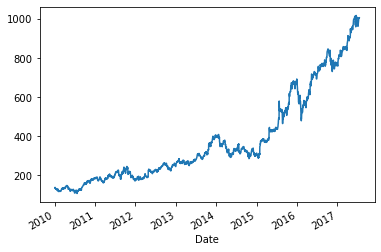

In [69]:
stock['Open'].plot()

In [76]:
ns = stock['Open'].rolling(10, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

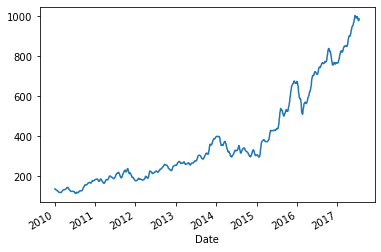

In [77]:
ns.plot()

In [85]:
stock.index.dayofyear

Int64Index([  4,   5,   6,   7,   8,  11,  12,  13,  14,  15,
            ...
            184, 186, 187, 188, 191, 192, 193, 194, 195, 198],
           dtype='int64', name='Date', length=1896)